# **Practical Assignment 1: Univariate Data Analysis for Data Quality Improvement**


# **Introduction**

[**The dataset "Rain in Australia"** ](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)comprises approximately $10$ years of daily weather observations collected from various locations across Australia, providing a rich resource for analyzing meteorological patterns.

**The Characteristics of the Dataset:**
1. **Data structure:**

- Total number of variables: $23$

- Number of predictors: $22$

- Number of target variables: $1$

2. **The typology of predictors:**

- Categorical variables: $6$

- Quantitative/continuous variables: $16$

**The task** we aim to address using this dataset is to predict the target variable *RainTomorrow*, which indicates the presence or absence of rain the following day. This binary **classification problem** is significant as it answers the essential question: will it rain tomorrow?

This classification task will be approached through **supervised learning techniques**,  where we will train the model to recognize patterns in the historical weather data that correlate with the occurrence of rain.

**The effectiveness of our model** will be evaluated using standard metrics relevant to binary classification tasks, including accuracy, precision, recall, F1 score and AUC-ROC. These metrics will help us determine how well our model can discriminate between days with and without rain.

# **Results**

### **Import libraries**

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, spearmanr
from sklearn.preprocessing import OneHotEncoder
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

## **1. Descriptive Statistics**

In [ ]:
# Loading data
from google.colab import drive
drive.mount('/content/drive/')
# Specifying paths to data
df = pd.read_csv(r"/content/drive/MyDrive/weatherAUS.csv")
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
# Upload data
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### **Description of the columns**

- **Date** - The date of observation
- **Location** - The common name of the location of the weather station
- **MinTemp** - The minimum temperature in degrees celsius
- **MaxTemp** - The maximum temperature in degrees celsius
- **Rainfall** - The amount of rainfall recorded for the day in mm
- **Evaporation** - The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- **Sunshine** - The number of hours of bright sunshine in the day
- **WindGustDir** - The direction of the strongest wind gust in the 24 hours to midnight
- **WindGustSpeed** - The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- **WindDir9am** - Direction of the wind at 9am
- **WindDir3pm** - Direction of the wind at 3pm
- **WindSpeed9am** - Wind speed (km/hr) averaged over 10 minutes prior to 9am
- **WindSpeed3pm** - Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- **Humidity9am** - Humidity (percent) at 9am
- **Humidity3pm** - Humidity (percent) at 3pm
- **Pressure9am** - Atmospheric pressure (hpa) reduced to mean sea level at 9am
- **Pressure3pm** - Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- **Cloud9am** - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how
- **Cloud3pm** - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- **Temp9am** - Temperature (degrees C) at 9am
- **Temp3pm** - Temperature (degrees C) at 3pm
- **RainToday** - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- **RainTomorrow** - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

#### **Decsribing data**

In [ ]:
# Describing all data
df.info()
# Describing numerical data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**Comment:** This dataset has $145 460$ rows and $23$ columns.

#### **Description of numerical data**

1. **MinTemp** ranges from $-8.5°C$ to $33.9°C$, with a mean of approximately $12.19°C$ and a standard deviation of $6.40°C$, indicating a wide variation in temperature across different locations and times.

2. **MaxTemp** ranges from $-4.8°C$ to $48.1°C$, with a mean of about $23.22°C$ and a standard deviation of $7.12°C$, suggesting significant temperature fluctuations that could impact weather conditions.

3. **Rainfall** ranges from $0$ mm to $371$ mm, with an average of $2.36$ mm. The standard deviation of $8.48$ mm indicates that while many days may receive little to no rain, there are instances of heavy rainfall that significantly affect the average.

4. **Evaporation** ranges from $0$ to $145$ mm, with an average of $5.47$ mm, suggesting variable evaporation rates that could correlate with temperature and humidity levels.

5. **Sunshine** ranges from $0$ to $14.5$ hours, with an average of about $7.6$ hours, indicating that Australia experiences substantial sunlight throughout the year.

6. **WindGustSpeed** ranges from $6$ to $135$ km/h and an average of approximately $40$ km/h, indicating that wind conditions can be quite strong at times.

7. **WindSpeed9am** ranges from $0$ to $130$ km/h and an average of approximately $14.04$ km/h, showing typical wind speeds during morning observations.

8. **WindSpeed3pm** ranges from $0$ to $87$ km/h and an average of approximately $18.66$ km/h, showing typical wind speeds during afternoon observations.

9. **Humidity9am** and **Humidity3pm** both range from $0$ to $100%$. **Humidity9am** averages around $68.88%$, while **Humidity3pm** averages at $51.54%$. The decrease in humidity from morning to afternoon suggests typical diurnal patterns where humidity levels drop as temperatures rise.

9. Atmospheric pressure readings at both **Pressure9am** ($1017.65$ hPa) and **Pressure3pm** ($1015.26$ hPa) indicate stable pressure conditions throughout the day, with minimal variation.

10. Cloud cover data at both morning (**Cloud9am**) and afternoon (**Cloud3pm**) shows averages around $4-4.5$ octas, indicating partial cloudiness typical for many regions in Australia.

11. The temperatures recorded at $9$ am (**Temp9am**) and $3$ pm (**Temp3pm**) average around $16.99°C$ and $21.68°C$ respectively, reflecting the warming trend expected throughout the day.

In [ ]:
# Describing categorical values
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


#### **Description of categorical variables**

1. **Location**
- The data covers 49 different locations.
- Canberra is the most frequently mentioned location.

2. **WindGustDir**
- There are 16 unique wind gust directions, which may indicate a variety of weather conditions.
- (Wes) is the most frequent direction of wind gusts

3. **WindDir9am**
- There are 16 unique wind gust directions.
- North is the most frequent wind direction at 9 a.m.

4. **WindDir3pm**
- There are 16 unique wind gust directions.
- Southeast is the most frequent wind direction at 3 p.m.

5. **RainToday**
- 2 — only 2 unique values (Yes/No).
- No — most of the entries indicate that it did not rain.

6. **RainTomorrow** (target variable)
- 2 — only 2 unique values (Yes/No).
- No — most of the entries indicate that it did not rain.

The number of records is less than the total number, which may indicate data gaps.

#### **More details on descriptive statistics:**

In [ ]:
def descriptive_statistics_cat(df):
    # Get frequencies for categorical variables
    freq = df.value_counts().reset_index()
    freq.columns = ['Category', 'Frequency']
    # Calculate percentages
    total = df.shape[0]
    freq['Percentage'] = (freq['Frequency'] / total) * 100
    return freq

def descriptive_statistics_num(df):
    # Check if it is a df Series and turn it into a DataFrame
    if isinstance(df, pd.Series):
        df = df.to_frame()
    # Get basic statistics
    stats = pd.DataFrame(
        {
            'mean': df.mean(),           # Mean
            'median': df.median(),       # Median
            'std_dev': df.std(),         # Standard deviation
            'range': df.max() - df.min(),# Range
            'Q1': df.quantile(0.25),     # The first quartile
            'Q2': df.quantile(0.50),     # The second quartile (median)
            'Q3': df.quantile(0.75),     # The third quartile
            'skewness': df.skew(),       # Skew
            'kurtosis': df.kurtosis()    # Kurtosis
        }
    ).T
    return stats

for col in df.columns:
  try:
    if col != 'RainTomorrow' and col != 'RainToday':
      descriptive_statistics_num(df[col])
      print(col)
      print(descriptive_statistics_num(df[col]))
    else:
      print(col)
      print(descriptive_statistics_cat(df[col]))
  except:
    descriptive_statistics_cat(df[col])
    print(col)
    print(descriptive_statistics_cat(df[col]))

Date
        Category  Frequency  Percentage
0     2013-11-12         49    0.033686
1     2014-09-01         49    0.033686
2     2014-08-23         49    0.033686
3     2014-08-24         49    0.033686
4     2014-08-25         49    0.033686
...          ...        ...         ...
3431  2007-11-29          1    0.000687
3432  2007-11-28          1    0.000687
3433  2007-11-27          1    0.000687
3434  2007-11-26          1    0.000687
3435  2008-01-31          1    0.000687

[3436 rows x 3 columns]
Location
            Category  Frequency  Percentage
0           Canberra       3436    2.362161
1             Sydney       3344    2.298914
2             Darwin       3193    2.195105
3          Melbourne       3193    2.195105
4           Brisbane       3193    2.195105
5           Adelaide       3193    2.195105
6              Perth       3193    2.195105
7             Hobart       3193    2.195105
8             Albany       3040    2.089922
9       MountGambier       3040    2.0899

## **2. Initial Model Performance (Baseline)**

**Preprocessing essential for Logistic Regression, that are dropping NaN values and replacing categorical values:**

In [ ]:
df.replace('nan', 'missing', inplace=True)
df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace = True)

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']))

df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1).drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1}, na_action='ignore')

print(df['RainTomorrow'].isnull().sum())
df.replace(np.nan, 0, inplace=True)
df

0


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = df.drop('RainTomorrow', axis=1).values
y = df['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_0 = LogisticRegression(max_iter = 1000)
model_0.fit(X_train, y_train)

y_pred_0 = model_0.predict(X_test)
accuracy_0 = accuracy_score(y_test, y_pred_0)
f1_0 = f1_score(y_test, y_pred_0)
roc_auc_0 = roc_auc_score(y_test, y_pred_0)

print('Accuracy = ', accuracy_0)
print('F-1 Score = ', f1_0)
print('ROC-AUC = ', roc_auc_0)

Accuracy =  0.8581354129741227
F-1 Score =  0.6312880044223328
ROC-AUC =  0.7472139273388614


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **3. Univariate Data Analysis**

### **3.1 Data Visualization**

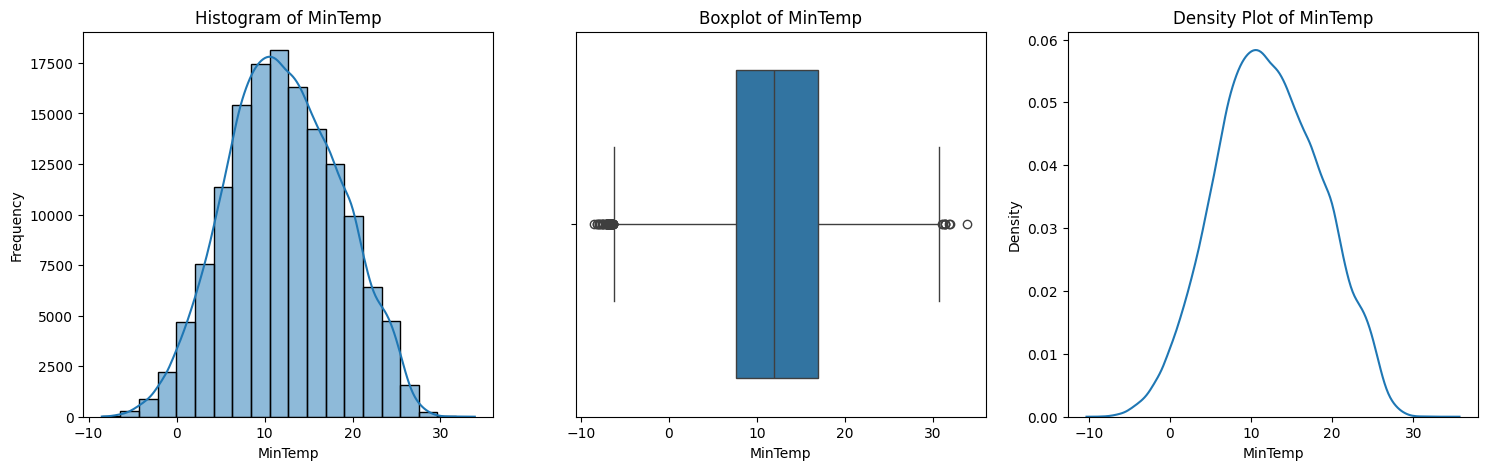

MinTemp


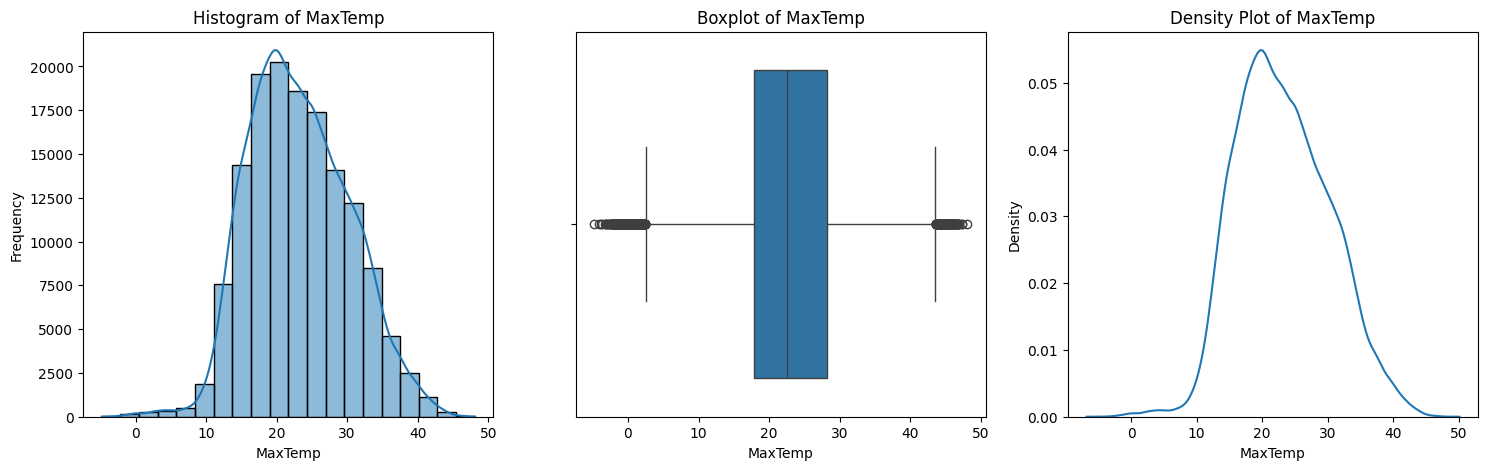

MaxTemp


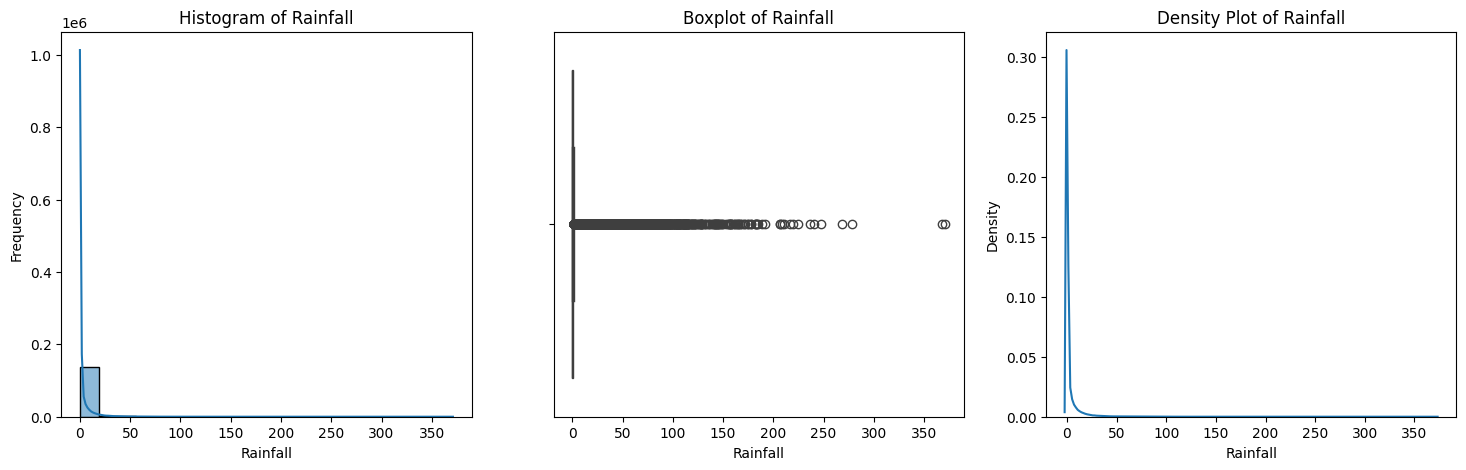

Rainfall


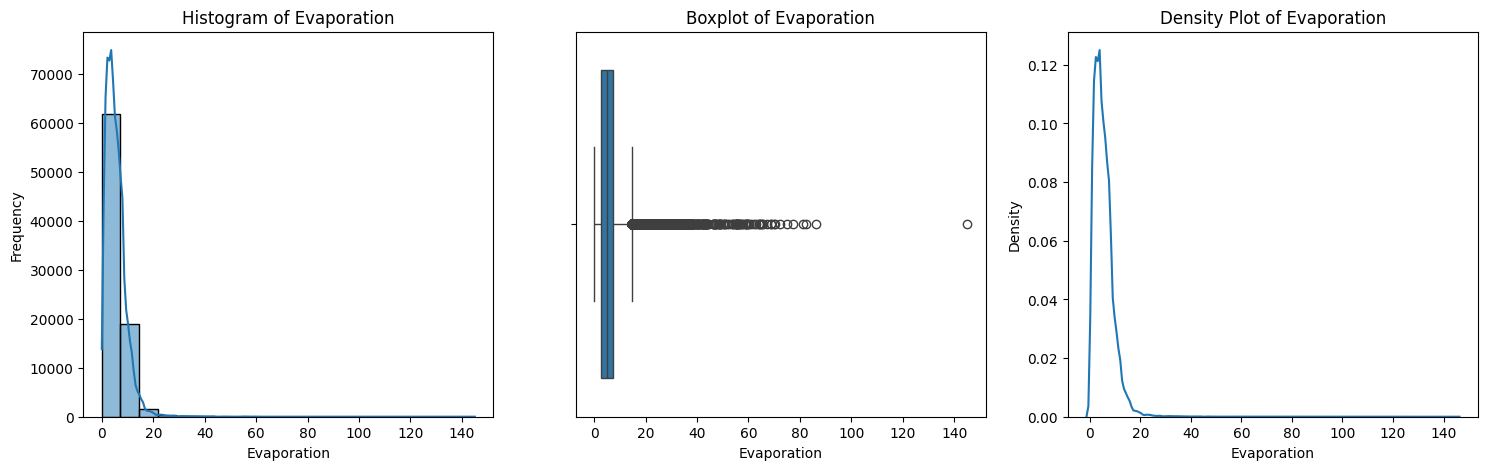

Evaporation


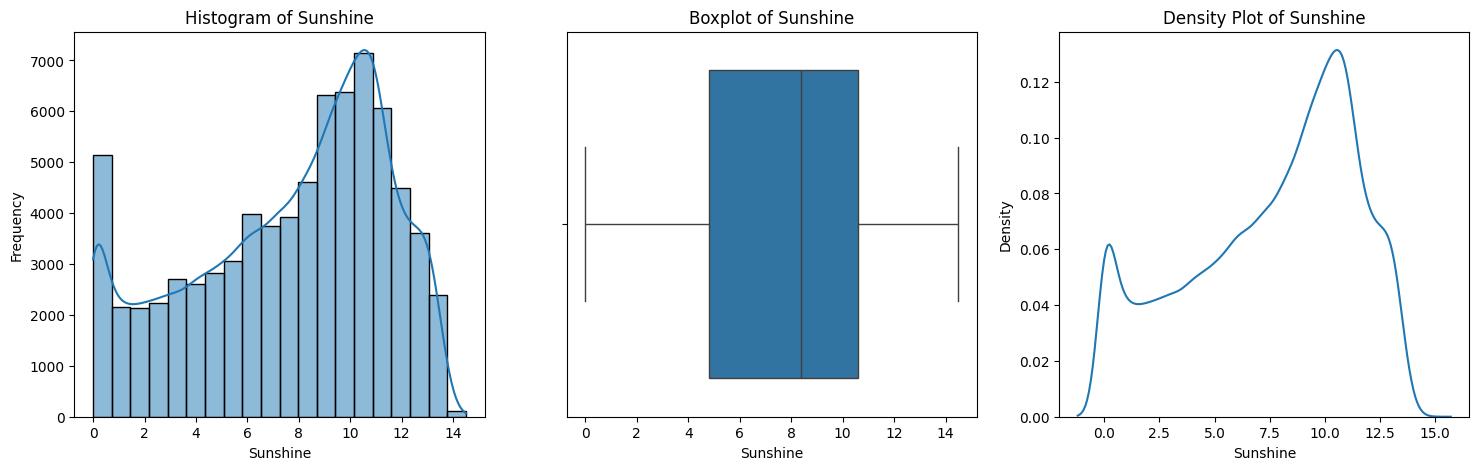

Sunshine


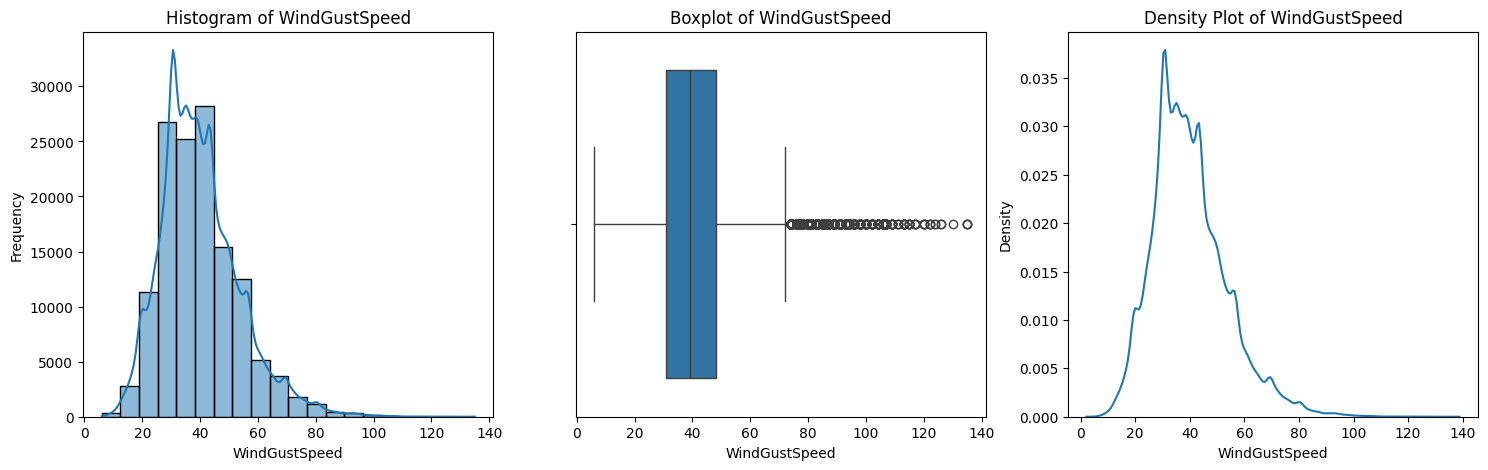

WindGustSpeed


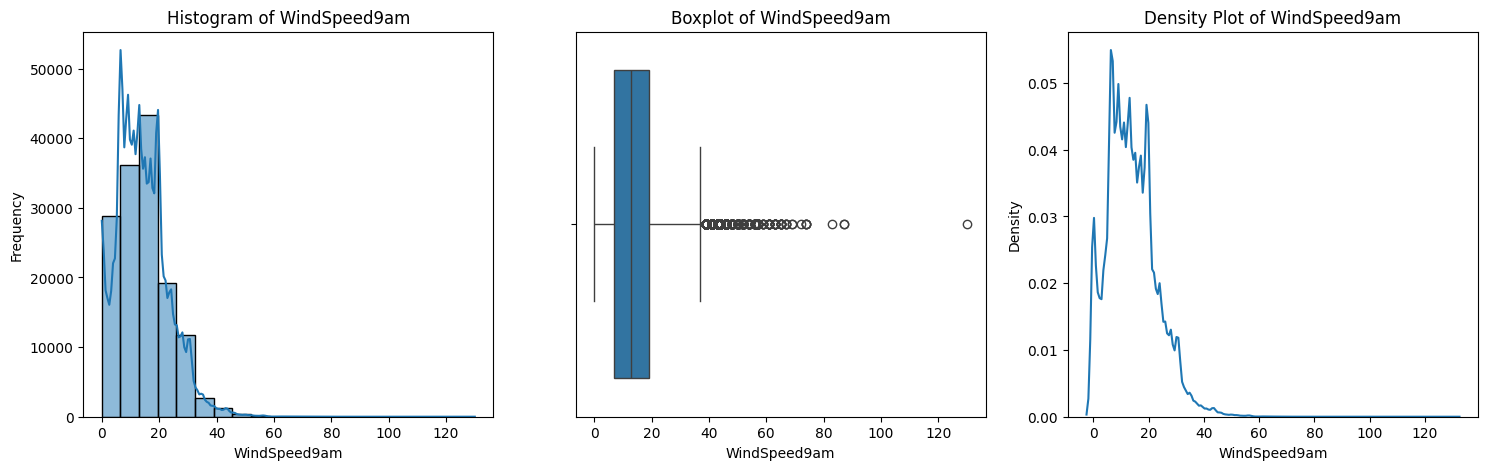

WindSpeed9am


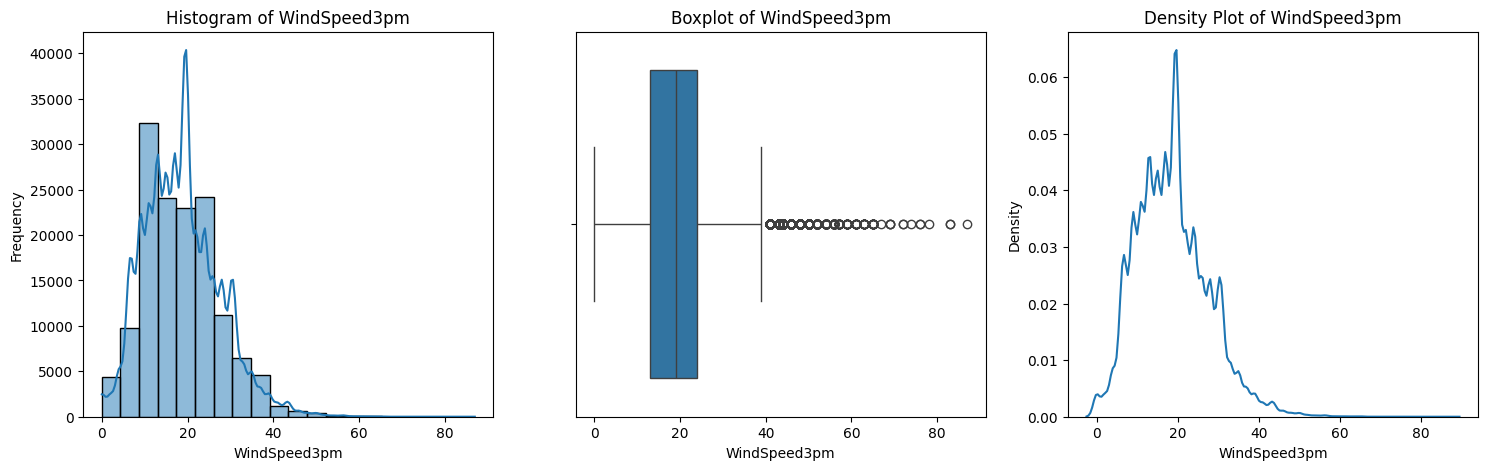

WindSpeed3pm


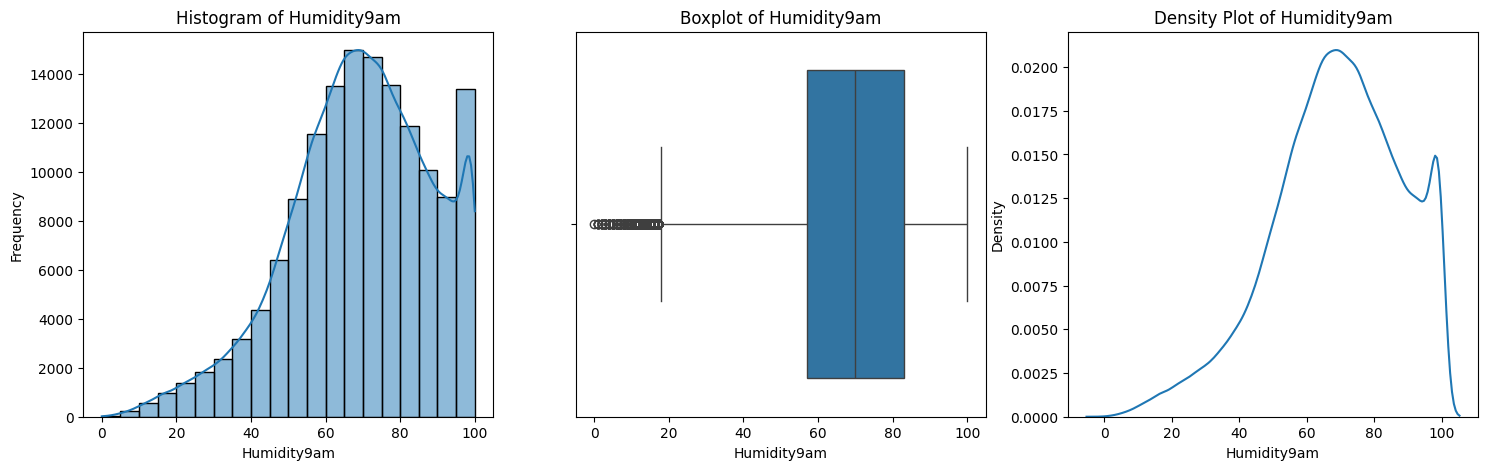

Humidity9am


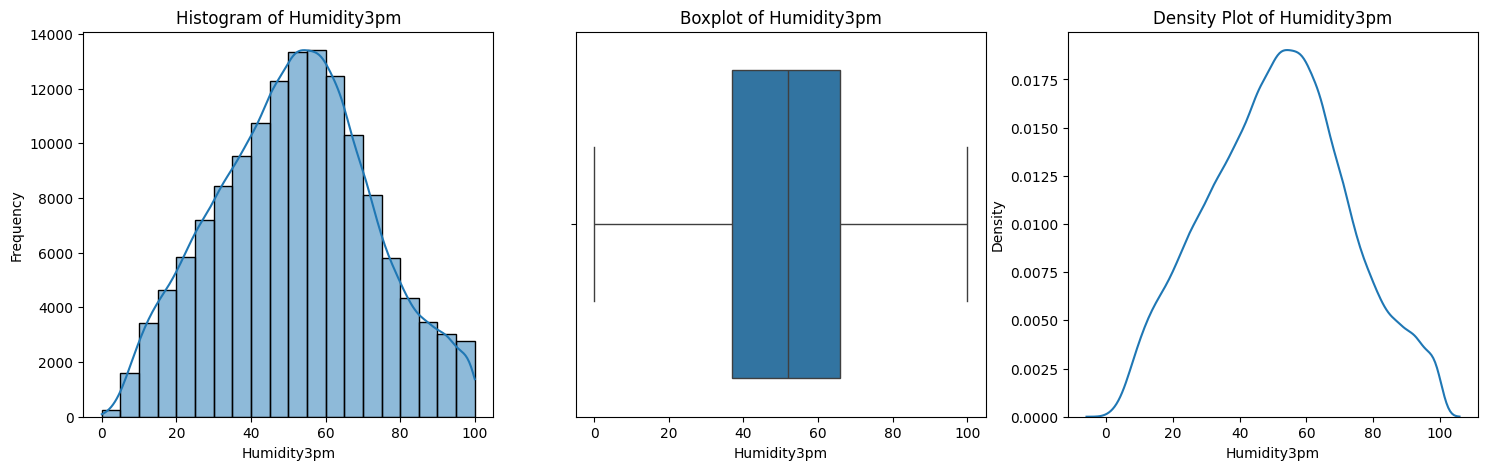

Humidity3pm


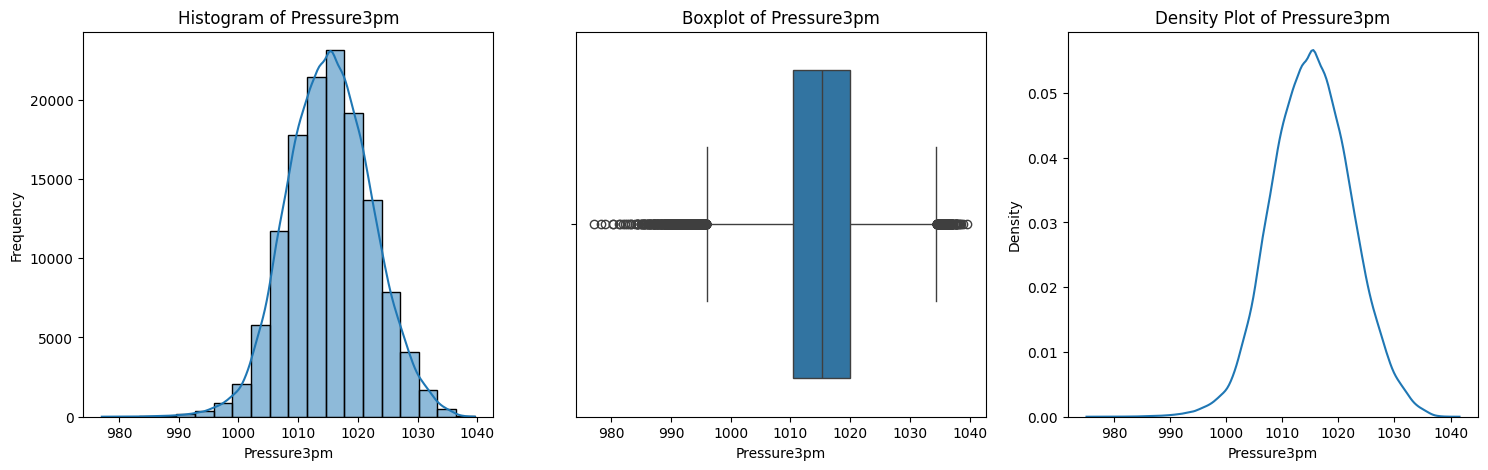

Pressure3pm


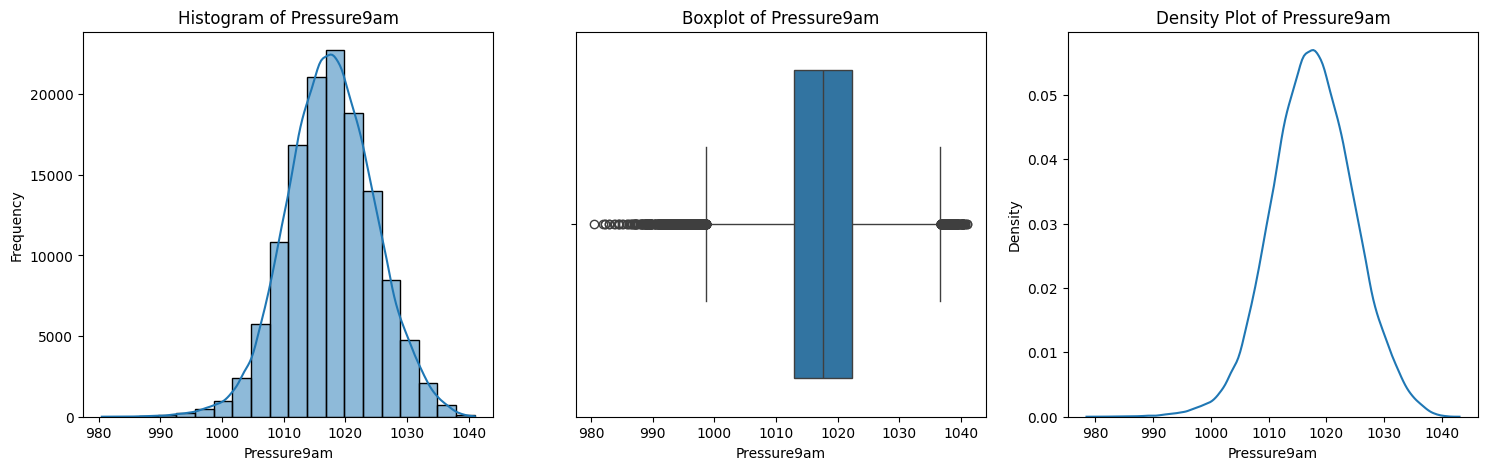

Pressure9am


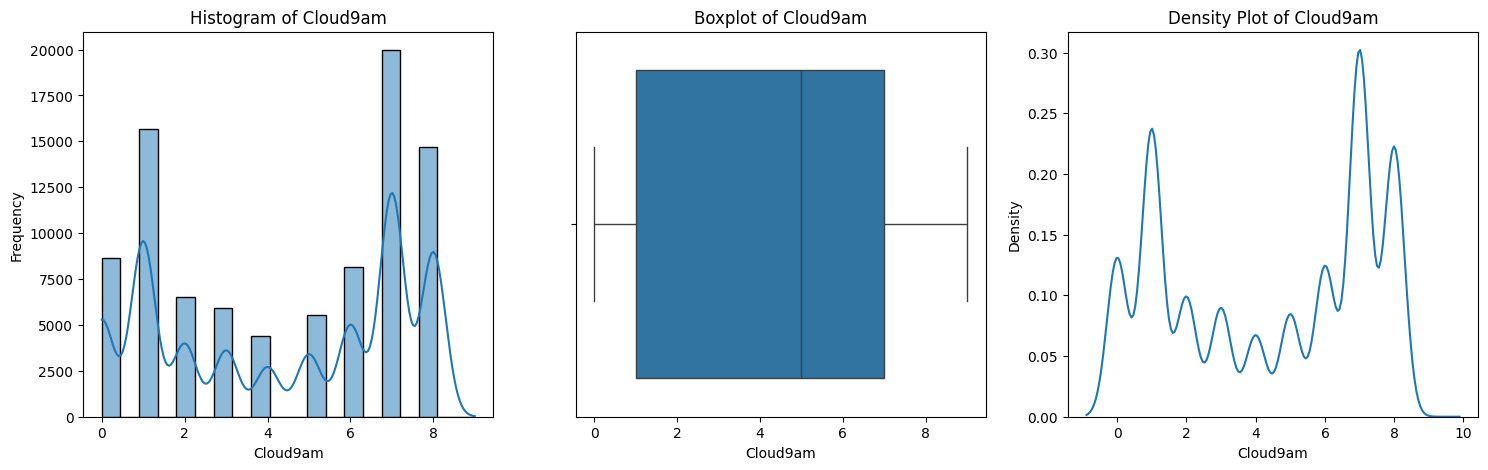

Cloud9am


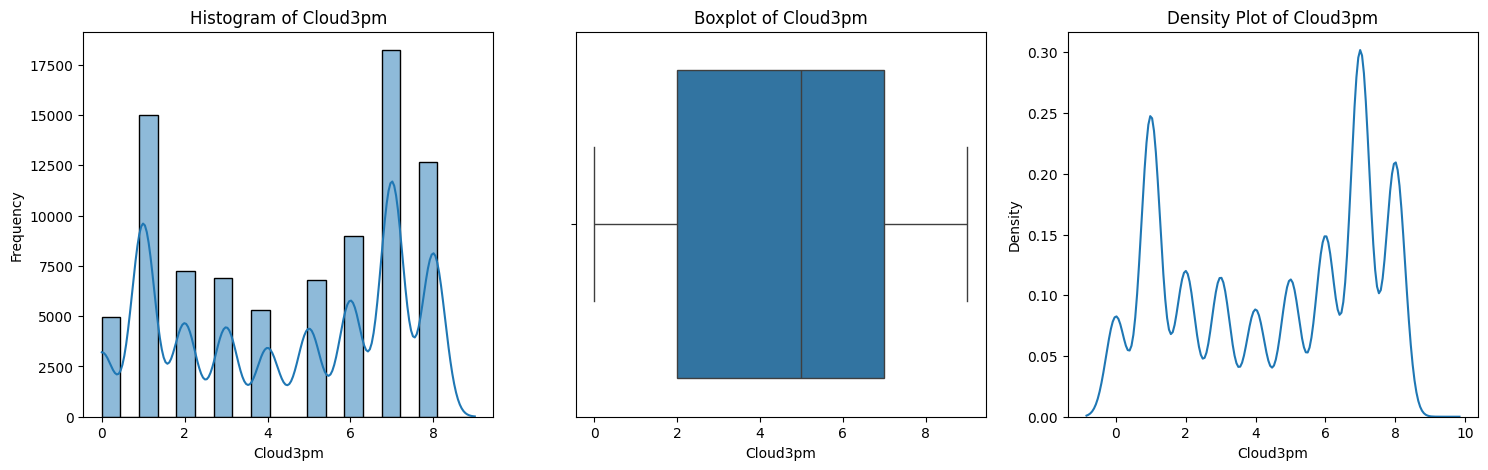

Cloud3pm


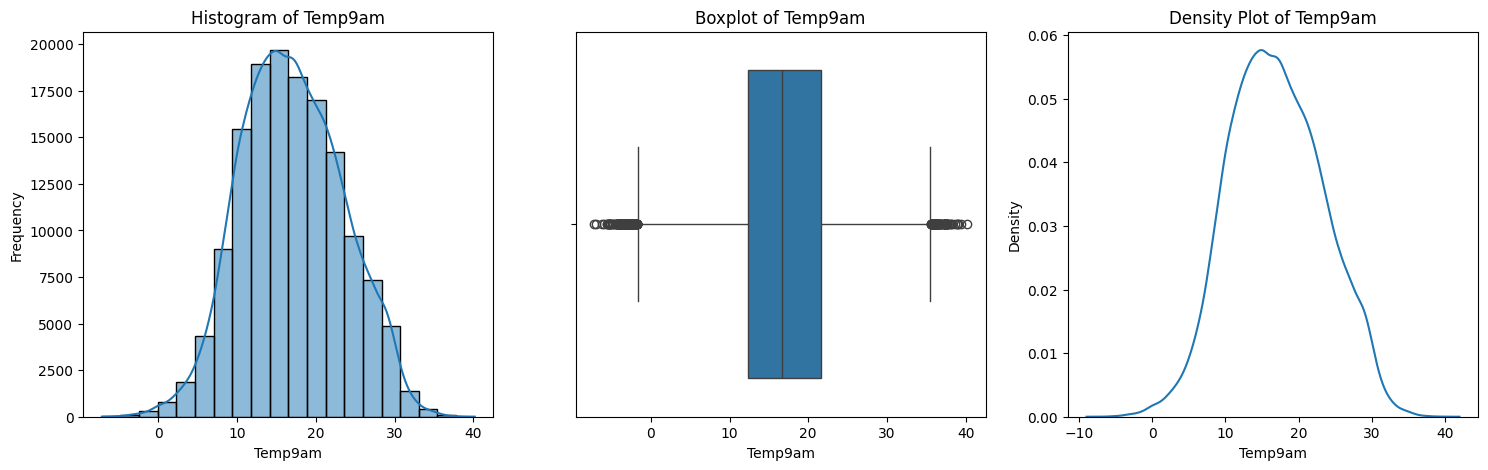

Temp9am


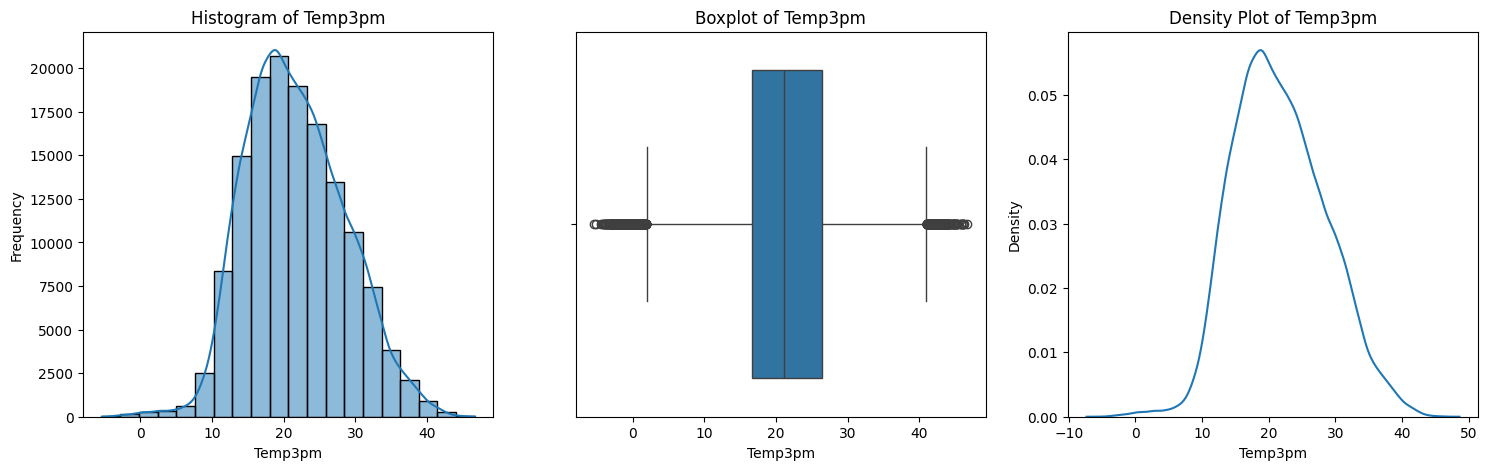

Temp3pm


In [ ]:
# Reading data
df = pd.read_csv('/content/weatherAUS.csv')

# List of variables to visualize
variables_to_visualize = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                          'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in variables_to_visualize:
    try:
        # Create a shape with three sub-graphs
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Histogram with KDE (Kernel Density Estimate)
        sns.histplot(df[col], bins=20, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')

        # Density plot
        sns.kdeplot(df[col], ax=axes[2])
        axes[2].set_title(f'Density Plot of {col}')

        plt.show()

        # Display statistics
        print(col)

    except Exception as e:
        # Error handling for each variable
        print(f'Error processing {col}: {e}')

#### **Description of data visualization results:**

Based on the results of the analysis of this plot, we can draw the following conclusions:

1. **Skewness:** most of the variables appear to be skewed to the right, with a long tail extending towards higher values. We can see it in variables like 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm'.

2. **Outliers:** the boxplots show the presence of outliers in several variables, particularly in variables like 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', and 'Pressure3pm'. We need to think about an appropriate strategy to deal with these outliers.

3. While some variables may not perfectly follow a normal distribution, we can suggest that several variables might be approximately normally distributed. This is observed in variables like 'MinTemp', 'MaxTemp', 'Humidity3pm', 'Temp9am', and 'Temp3pm'.

Overall, we need to choose an appropriate strategy to deal with outliers. We also need to explore data transformations, such as logarithmic transformations, to improve the normality and symmetry of skewed variables.

### **3.2 Handling Missing Values**

Our dataset seem not to win from univariate imputation. To assess whether this approach might compromise the data's integrity, we've decided to devide the futher actions to two versions of the dataset:

1. The original dataset used for initial model performance
2. A new dataset where missing values are imputed using univariate techniques

This approach will allow us to compare the performance of models trained on both datasets, providing insights into the effectiveness of our imputation methods. Furthermore, we'll retain the original dataset for future comparisons when evaluating model performance with different techniques.

For clarity, we'll refer to the dataset with imputed missing values as the "Dataset with Handled Missing Values" or Dataset with HMV (```dff```) throughout our analysis.

This dual-dataset strategy will enable us to:

- Assess the impact of univariate imputation on model performance
- Compare the effectiveness of various data handling techniques
- Maintain a baseline for evaluating future improvements in our data preprocessing pipeline

In [ ]:
# Reading data
dff = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
dff = pd.read_csv(r"/content/drive/MyDrive/weatherAUS.csv")
dff.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
dff.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
# Showing the amount of null values per column
print(dff.isnull().sum()/dff.shape[0]*100)

# Sorting values into 3 category: a group with less than 10% of nulls, which is going to be deleted, a categorical or continiuos values
categorical, contin, drop_na =[],[], []

for i in dff.columns:

    if dff[i].isnull().sum()/dff[i].shape[0]*100 < 10:
        drop_na.append(i)

    if dff[i].dtype == 'object':
        categorical.append(i)
    else:
        contin.append(i)

print(categorical)
print(contin)

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
# Deleting null values in columns with less than 10% nulls
dff.dropna(subset = drop_na, inplace=True)
print(dff.isnull().sum()/dff.shape[0]*100)
dff.reset_index(drop=True)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      36.434802
Sunshine         40.982068
WindGustDir       0.000000
WindGustSpeed     0.000000
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         33.039628
Cloud3pm         34.222714
Temp9am           0.000000
Temp3pm           0.000000
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112920,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
112921,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
112922,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
112923,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [ ]:
# Filling null values with mode value for categorical columns
for i in categorical:
    dff[i].fillna(dff[i].mode()[0], inplace=True)

# Filling null values with mean value for continious columns
for i in contin:
    dff.fillna({i:dff[i].mean()}, inplace=True)

# Making sure all nulls are deleted
print(dff.isnull().sum()/dff.shape[0]*100)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64


<ipython-input-8-2278a5218d3a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff[i].fillna(dff[i].mode()[0], inplace=True)


####Thus, we've got the "Dataset with HMV"

#### **Analysis and comparison of sample methods:**

Missing values were identified for each variable. There are two primary approaches for handling missing data: deletion and imputation.

**Comparison of Methods**

1) **Deletion Methods**
- **Listwise Deletion:** This method removes any records with missing values across any variable. While it is straightforward to implement, it can lead to biased results if the missing data is not random.
- **Pairwise Deletion:** This approach retains cases with available data for each analysis, which can help preserve more information compared to listwise deletion. However, it can result in inconsistent sample sizes across analyses and may still introduce bias if the missingness is related to the outcome.

2) **Imputation Methods**
- **Mean/Median Imputation:** Missing values are replaced with the mean or median of the observed values.
- **Mode Imputation:** For categorical variables, replacing missing values with the mode is common.
- **Multiple Imputation:** This advanced technique involves creating several imputed datasets and combining results, providing a more robust estimate that accounts for uncertainty in missing data.

**Selected methods:**

In this analysis, a combination of deletion and imputation strategies was used based on the percentage of missing values per column:

- Deletion for Low Missing Data: Columns with less than 10% missing values were dropped using listwise deletion. This decision was justified as retaining these records was unlikely to introduce significant bias while simplifying the dataset for further analysis.

- Imputation for Remaining Data: Categorical variables were filled using mode imputation, ensuring that the most common category was preserved without introducing excessive bias. Continuous variables were filled using mean imputation, which provided a reasonable estimate without overly complicating the process.

This mixed approach effectively minimized data loss while addressing the issue of missing values, ensuring that the dataset remained robust for subsequent analyses.

### **+ One Hot Encoding**

In [ ]:
 # Spliting dates
dff['Date'] = pd.to_datetime(dff['Date'])
dff['Year'] = dff['Date'].dt.year
dff['Month'] = dff['Date'].dt.month
dff['Day'] = dff['Date'].dt.day
dff.drop(['Date'], axis=1, inplace = True)

# One Hot Encoder for converting categorical features into numerical format
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(dff[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']])
encoded_dff = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']))
dff = pd.concat([dff.reset_index(drop=True), encoded_dff.reset_index(drop=True)], axis=1).drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)
dff['RainTomorrow'] = dff['RainTomorrow'].map({'No': 0, 'Yes': 1}, na_action='ignore')

In [ ]:
dff.dropna(inplace=True)
print(dff.isnull().sum())

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
                 ..
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
RainToday_No      0
RainToday_Yes     0
Length: 114, dtype: int64


### **Сlass Balance**

####Balancing the initial model dataset

In [ ]:
# Checking the balance of classes
print(df['RainTomorrow'].value_counts())

RainTomorrow
0    43993
1    12427
Name: count, dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

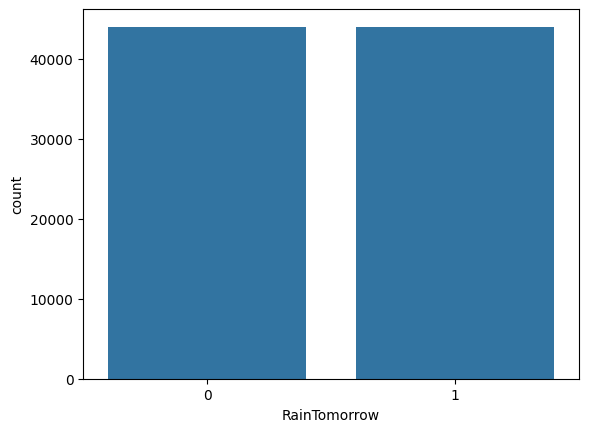

In [ ]:
yes = df[df['RainTomorrow'] == 1]
no = df[df['RainTomorrow'] == 0]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])
sns.countplot(df, x='RainTomorrow')

In [ ]:
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,43993
1,43993


####Balancing the dataset with HMV

In [ ]:
# Checking the balance of classes
print(dff['RainTomorrow'].value_counts())

RainTomorrow
0    87906
1    25019
Name: count, dtype: int64


<Axes: xlabel='RainTomorrow', ylabel='count'>

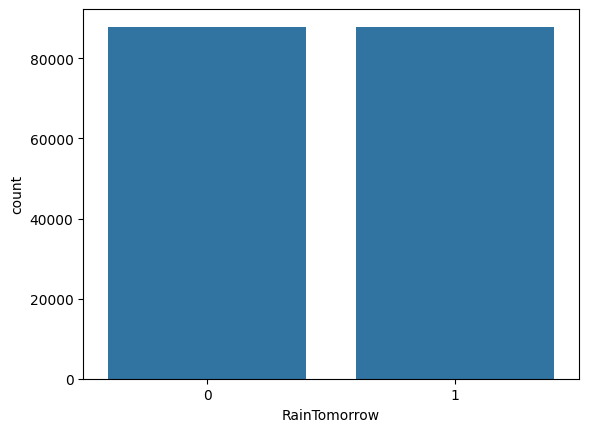

In [ ]:
yes = dff[dff['RainTomorrow'] == 1]
no = dff[dff['RainTomorrow'] == 0]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
dff = pd.concat([no, yes_oversampled])
sns.countplot(dff, x='RainTomorrow')

In [ ]:
dff['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,94906
1,94906


In [ ]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
36569,11.0,29.0,0.0,9.8,11.6,43.0,6.0,13.0,46.0,15.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36591,15.3,23.2,0.0,10.2,8.7,61.0,22.0,30.0,47.0,19.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
36604,9.0,25.4,0.0,4.8,11.2,39.0,4.0,17.0,76.0,32.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
36622,9.9,22.4,2.0,5.0,11.0,41.0,13.0,15.0,70.0,38.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36646,7.6,15.2,0.8,0.8,6.7,39.0,19.0,20.0,79.0,47.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79905,7.8,10.4,2.4,2.4,1.0,43.0,19.0,15.0,79.0,99.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
80865,13.0,22.4,0.0,4.8,3.8,41.0,17.0,15.0,81.0,57.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38036,9.2,15.4,0.8,0.6,4.9,57.0,17.0,24.0,86.0,60.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
79905,7.8,10.4,2.4,2.4,1.0,43.0,19.0,15.0,79.0,99.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### **3.3 Outlier Detection and Treatment**

In [ ]:
def remove_outliers_iqr(df):
    cont_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

    for column in df.columns:
      if column in cont_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#### For the Initial model dataset

In [ ]:
# For choosing a method of transforming outliers
cont_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

lever = 0 # We've tried both methods and have chosen the best one :)

if (lever == 1):
  df = remove_outliers_iqr(df)
  print("DataFrame after removing outliers using IQR:")
  print(df)

else:
  for i in df[cont_cols].columns:
    df[i] = winsorize(df[i], limits=[0.05, 0.05])
  df.reset_index(drop=True)

#### For the Dataset with HMV

In [ ]:
# Removing outliers
# For choosing a method of transforming outliers
lever = 0

if (lever == 1):
  dff = remove_outliers_iqr(dff)
  print("DataFrame after removing outliers using IQR:")
  print(dff)

else:
  for i in dff.columns:
    dff[i] = winsorize(dff[i], limits=[0.05, 0.05])
  dff.reset_index(drop=True)

#### **Justification of sample methods:**

In our initial analysis, we attempted to use the Interquartile Range (IQR) method to remove outliers from the dataset. However, this approach proved to be suboptimal for the following reasons:

1. **Excessive data loss:** Applying the IQR method resulted in the removal of a significant number of records, leading to a substantial reduction in the volume of data available for training the model.
2. **Negative impact on performance:** Removing outliers using the IQR method did not lead to the expected improvement in model performance. On the contrary, it have resulted in the loss of important information.

Considering these drawbacks, we decided to switch to the winsorization method, which proved to be more effective:

1. **Preserving data structure:** Winsorization allowed us to maintain the overall structure of the data by replacing extreme values with less extreme ones, rather than removing them entirely.
2. **Positive impact on the model:** Applying winsorization led to a more noticeable improvement in model performance compared to the outlier removal method.
3. **Flexibility in configuration:** We used a 5% threshold on both sides of the distribution for all continuous variables, which effectively processed outliers while preserving important information in the data.

### **3.4 Variable Transformation**

In [ ]:
# Logarithmic Transformation
def log_transform(column):
    if np.any(column <= 0):
        raise ValueError("All values must be positive for logarithmic transformation")
    return np.log(column)

# Square Root Transformation
def sqrt_transform(column):
    return np.sqrt(column)

# Box-Cox Transformation
def box_cox_transform(column):
    if np.any(column <= 0):
        raise ValueError("All values must be positive for the Box-Cox transformation")
    transformed_data, _ = stats.boxcox(column)
    return transformed_data
# Yeo-Johnson Transformation
def yeo_johnson_transform(column):
    transformed_data, _ = stats.yeojohnson(column)
    return transformed_data

In [ ]:
# Select a Transformation Method
def select_transform(column):
    if np.all(column > 0):
        skewness = stats.skew(column)
        if abs(skewness) > 1:
            return box_cox_transform
        else:
            return log_transform
    elif np.all(column >= 0):
        return sqrt_transform
    else:
        return yeo_johnson_transform # this one can deal with negative values

In [ ]:
# Processing Data
def process_dataset(dataset, method='iqr', threshold=3):
    transformed_dataset = dataset.copy()
    for column in dataset.select_dtypes(include=[np.number]).columns:
            transform_func = select_transform(dataset[column])
            if transform_func:
                try:
                    transformed_column = transform_func(dataset[column])
                    transformed_dataset[column] = transformed_column
                    print(f"Column '{column}' is transformed using {transform_func.__name__}")
                except ValueError as e:
                    print(f"Error in column transformation '{column}': {str(e)}")
            else:
                print(f"A suitable transformation for the column '{column}' is not found")
    return transformed_dataset

#### **For the Initial model dataset**

In [ ]:
# Processing the dataset
df[cont_cols] = process_dataset(df[cont_cols])

Column 'MinTemp' is transformed using log_transform
Column 'MaxTemp' is transformed using log_transform
Column 'Rainfall' is transformed using sqrt_transform
Column 'Evaporation' is transformed using log_transform
Column 'Sunshine' is transformed using sqrt_transform
Column 'WindGustSpeed' is transformed using log_transform
Column 'WindSpeed9am' is transformed using log_transform
Column 'WindSpeed3pm' is transformed using log_transform
Column 'Humidity9am' is transformed using log_transform
Column 'Humidity3pm' is transformed using log_transform
Column 'Pressure9am' is transformed using log_transform
Column 'Pressure3pm' is transformed using log_transform
Column 'Cloud9am' is transformed using sqrt_transform
Column 'Cloud3pm' is transformed using log_transform
Column 'Temp9am' is transformed using log_transform
Column 'Temp3pm' is transformed using log_transform


#### **For the dataset with HMV**

In [ ]:
dff[cont_cols] = process_dataset(dff[cont_cols])

Column 'MinTemp' is transformed using log_transform
Column 'MaxTemp' is transformed using log_transform
Column 'Rainfall' is transformed using sqrt_transform
Column 'Evaporation' is transformed using log_transform
Column 'Sunshine' is transformed using log_transform
Column 'WindGustSpeed' is transformed using log_transform
Column 'WindSpeed9am' is transformed using log_transform
Column 'WindSpeed3pm' is transformed using log_transform
Column 'Humidity9am' is transformed using log_transform
Column 'Humidity3pm' is transformed using log_transform
Column 'Pressure9am' is transformed using log_transform
Column 'Pressure3pm' is transformed using log_transform
Column 'Cloud9am' is transformed using log_transform
Column 'Cloud3pm' is transformed using log_transform
Column 'Temp9am' is transformed using log_transform
Column 'Temp3pm' is transformed using log_transform


In [ ]:
df['WindGustDir_ESE']

,WindGustDir_ESE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
56415,0.0
56416,0.0
56417,0.0
56418,1.0


#### **Justification of sample methods:**

1. **Outliers Detection**

To detect outliers, we used two methods: IQR and Z-score. In the data processing process, we chose the IQR method because it is more resistant to outliers and is better suited for distributions that may be asymmetric.

2. **Data Transformation**
The choice of this particular set of data transformations is justified and represents an effective approach to normalizing distributions in the dataset.

3. **Transformation Selection Logic:**

The `select_transform` chooses the most appropriate transformation:

1. For strictly positive data:
  * If skewness > 1, **Box-Cox transformation*** is used for highly skewed distributions.

   ** **The Box-Cox transformation** is a versatile approach, encompassing a family of power transformations. It optimizes the λ parameter to achieve the best approximation to normality.*

  * Otherwise, **logarithmic transformation*** is used for moderately skewed distributions.
   
   ** **Logarithmic transformation** is useful for data with right-skewed distributions and exponential growth. It effectively compresses high values and stretches low values, helping to normalize the distribution.*


2. For non-negative data, **square root transformation** is used, which can handle zero values. It is less aggressive than logarithmic but still effective in reducing right-skewed distributions.


3. For the rest of data (with negative values), **Yeo-Johnson transformation** is used. It is an extension of the Box-Cox transformation that can work with negative values.


### **3.5 Feature Scaling**

#### **For the Initial model dataset**

In [ ]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler

k = 0 # We've tried both methods and have chosen the best one :)

if k == 1:
  scaler = StandardScaler()
  # Fit and transform the data
  df[contin] = scaler.fit_transform(df[contin])
else:
  scaler = MinMaxScaler()
  # Fit and transform the data
  df[contin] = scaler.fit_transform(df[contin])



print(categorical)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### **For the dataset with HMV**

In [ ]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler

k = 0 # We've tried both methods and have chosen the best one :)

if k == 1:
  scaler = StandardScaler()
  # Fit and transform the data
  dff[contin] = scaler.fit_transform(dff[contin])
else:
  scaler = MinMaxScaler()
  # Fit and transform the data
  dff[contin] = scaler.fit_transform(dff[contin])

#### **Justification of sample methods:**

Initially, we also tried using StandardScaler, which normalizes data to have a mean of 0 and a standard deviation of 1. However, after conducting experiments, we found that the logistic regression model showed better results when using MinMaxScaler. This may be due to the following factors:

1. Preservation of the original data distribution.
2. Better handling of boundary values in the context of meteorological data.
3. More effective handling of non-linear relationships between features, which is important for weather forecasting.

In [ ]:
for i in contin:
    df[i] = np.sqrt(df[i])
df.reset_index(drop=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,1.698470,1.883279,0.000000,1.565569,1.872735,1.967537,1.338566,1.730818,1.893018,1.700109,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.706561,1.834078,0.000000,1.565569,1.876530,1.900242,1.715937,1.715937,1.893018,1.700109,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.721997,1.883279,0.000000,1.542578,1.804374,1.956691,1.844234,1.645615,1.933305,1.758136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.756840,1.883279,0.000000,1.560004,1.868917,1.853102,1.338566,1.394959,1.900242,1.758136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.785036,1.883279,0.000000,1.554321,1.702432,1.885563,1.683215,1.601546,1.893018,1.700109,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87981,1.260649,1.613285,1.158292,0.000000,1.174055,2.027529,1.805020,1.730818,2.104951,2.093329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
87982,1.155422,1.601546,0.000000,0.832555,0.914691,2.019291,1.683215,1.853102,2.039334,2.104951,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
87983,1.474704,1.786190,0.000000,0.000000,1.702432,1.977883,1.645615,1.825433,1.982883,1.914043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87984,1.507357,1.601546,1.189207,0.000000,0.000000,1.987774,1.482304,1.683215,2.136434,2.123878,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **3.6 Noise Removal**

#### **For the Initial model dataset**

In [ ]:
df[cont_cols] = df[cont_cols].rolling(window=3).mean()

#### **For the dataset with HMV**

In [ ]:
dff[cont_cols] = dff[cont_cols].rolling(window=3).mean()

## **4. Visualisation after data analysis**

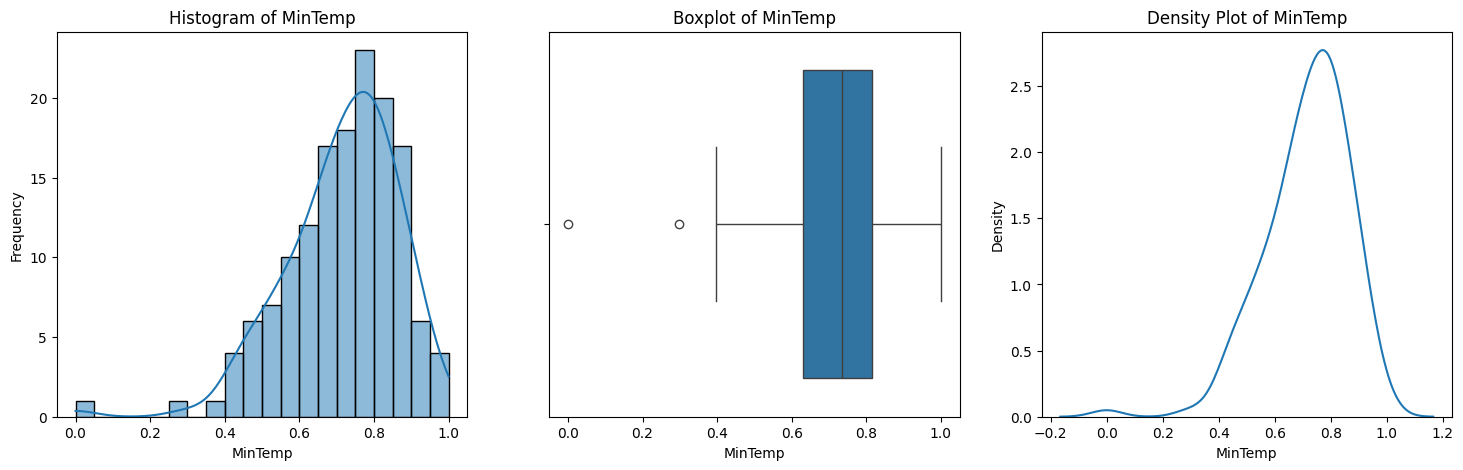

MinTemp


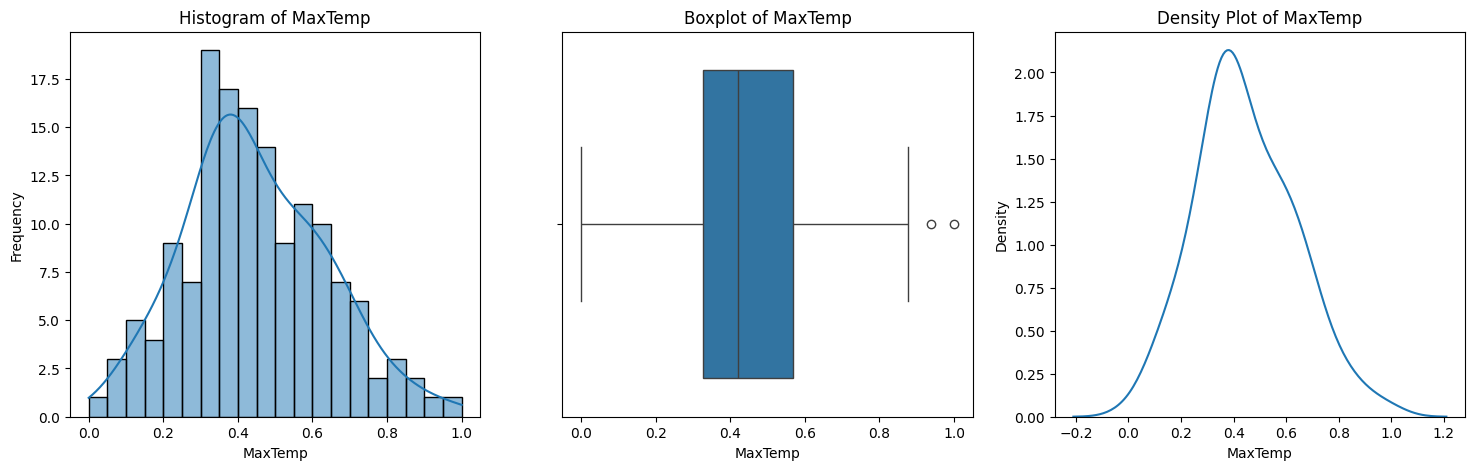

MaxTemp


<ipython-input-36-10e94282d1be>:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], ax=axes[2])


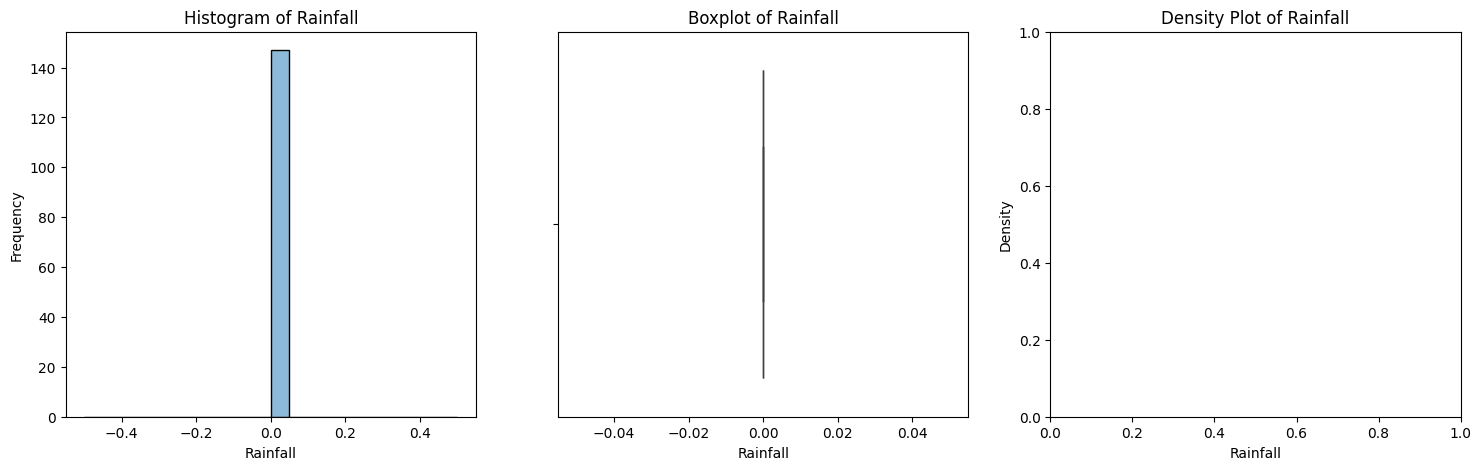

Rainfall


<ipython-input-36-10e94282d1be>:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], ax=axes[2])


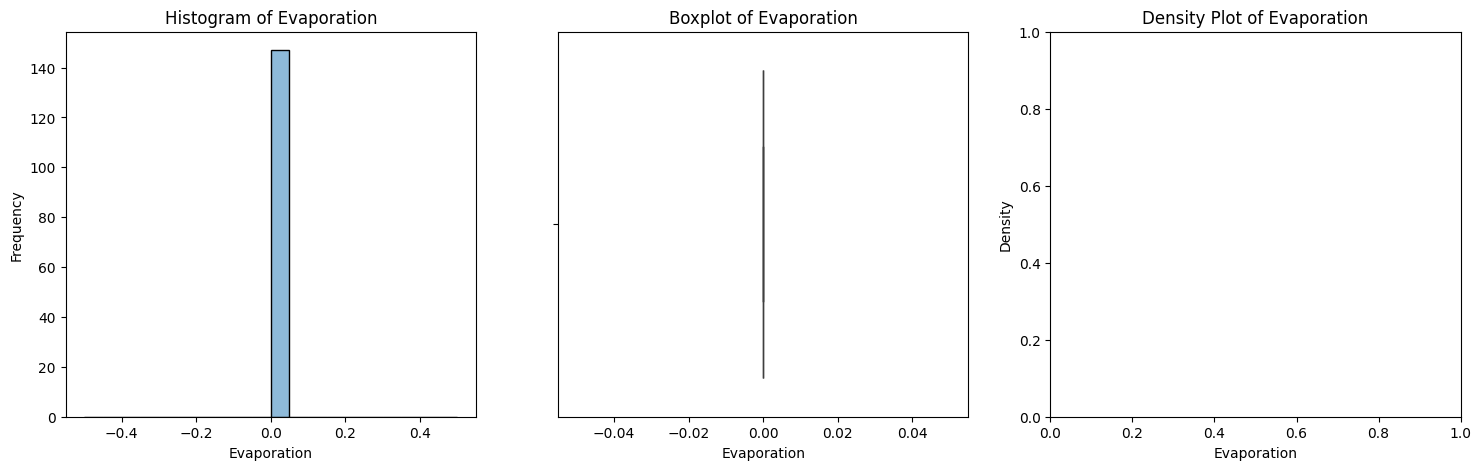

Evaporation


<ipython-input-36-10e94282d1be>:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], ax=axes[2])


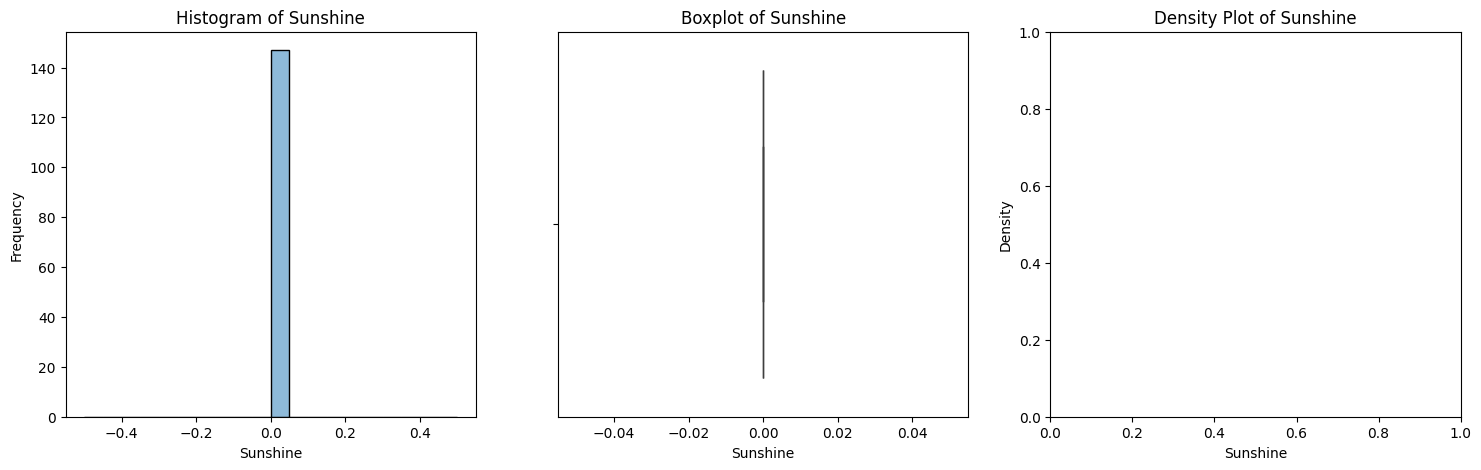

Sunshine


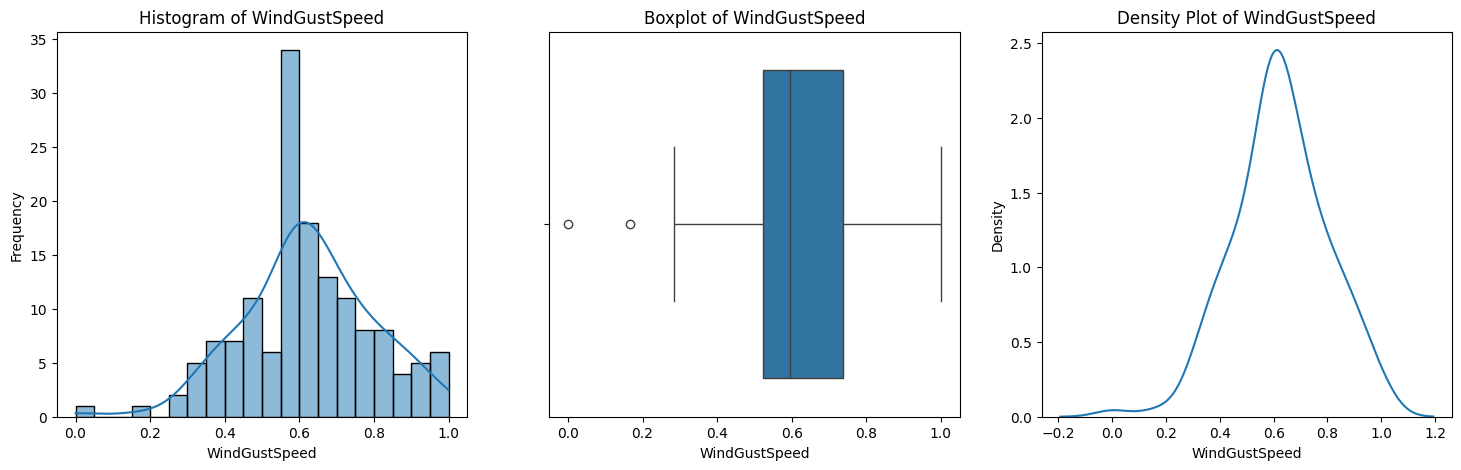

WindGustSpeed


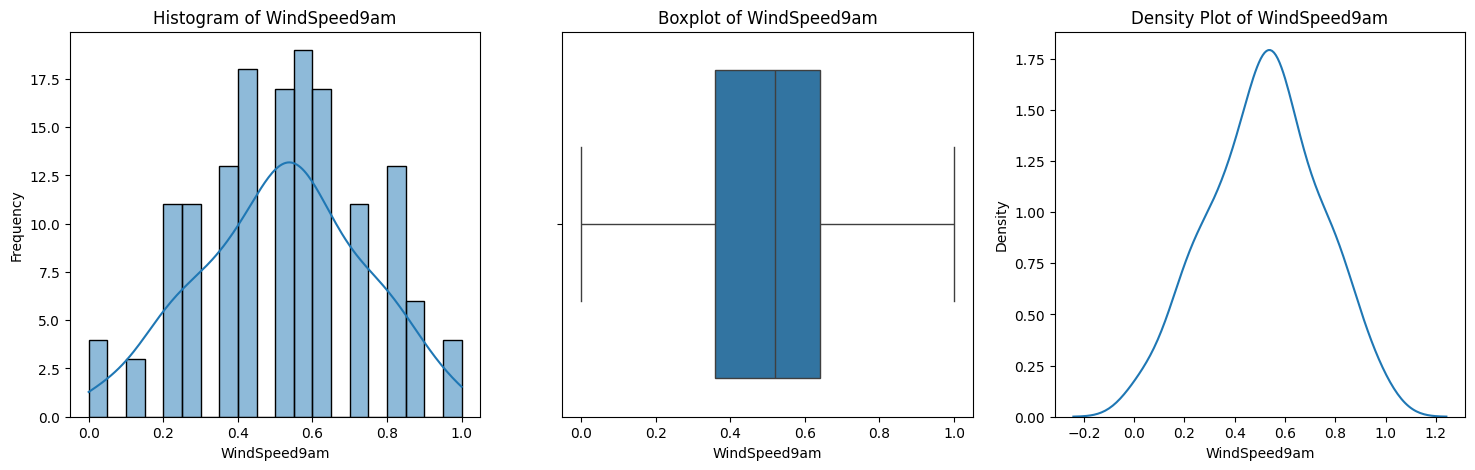

WindSpeed9am


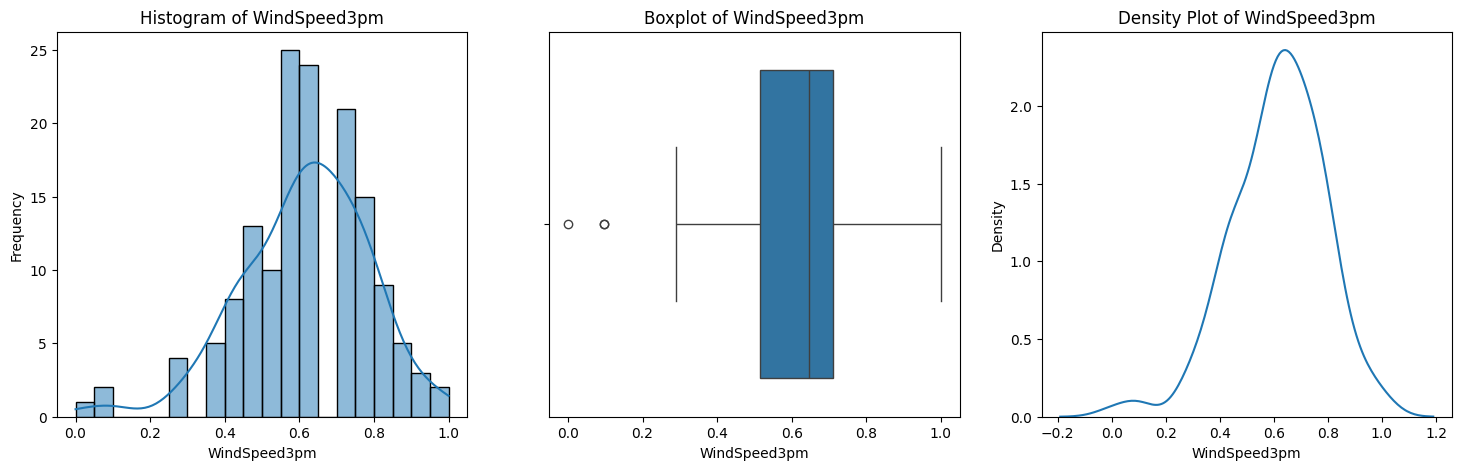

WindSpeed3pm


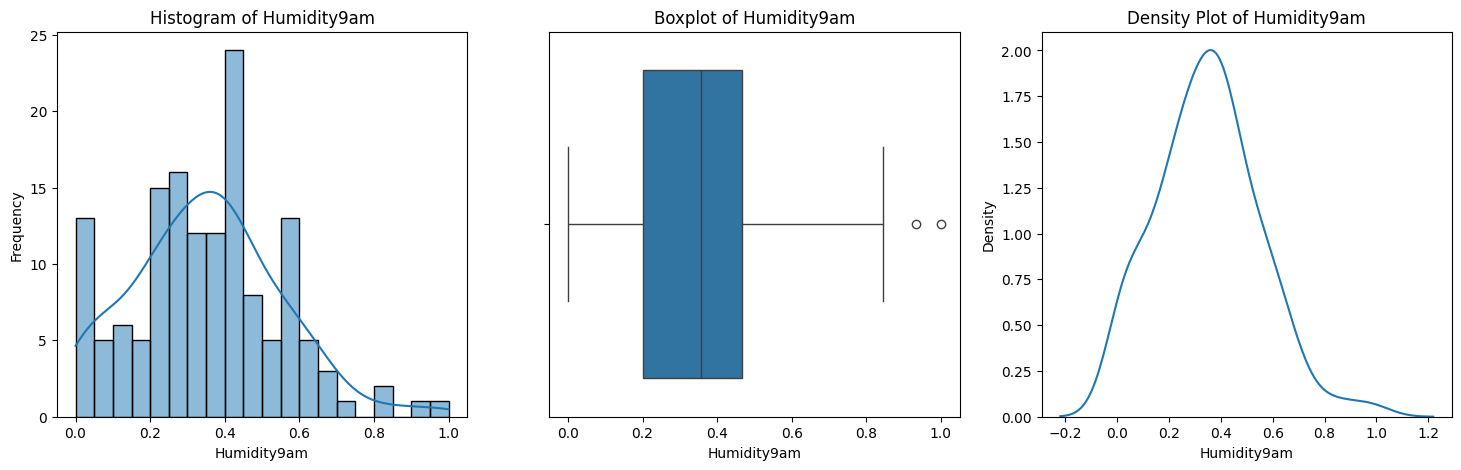

Humidity9am


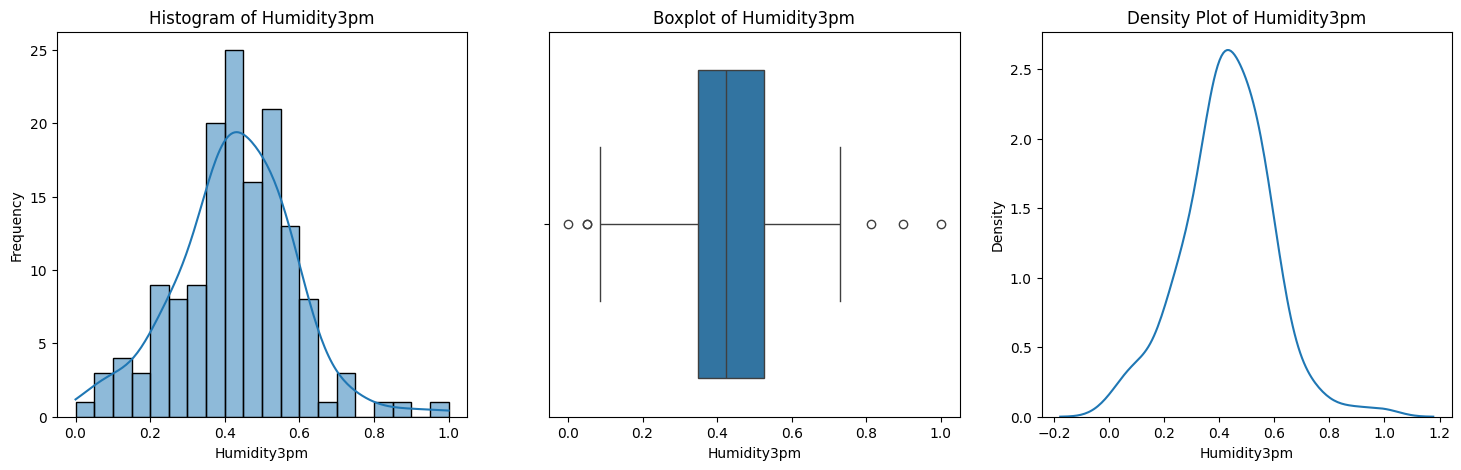

Humidity3pm


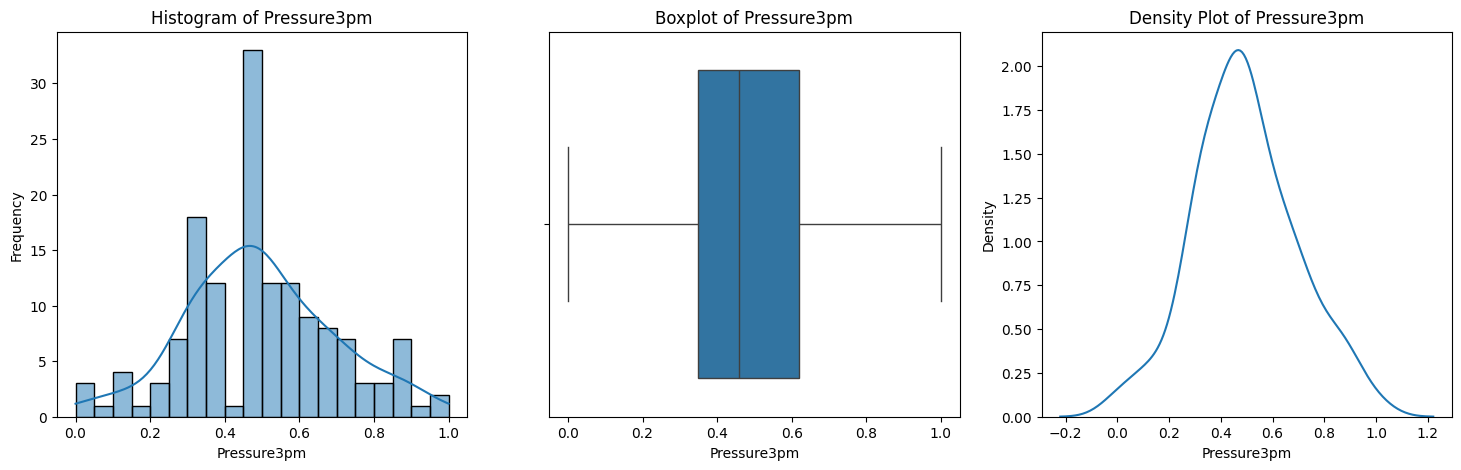

Pressure3pm


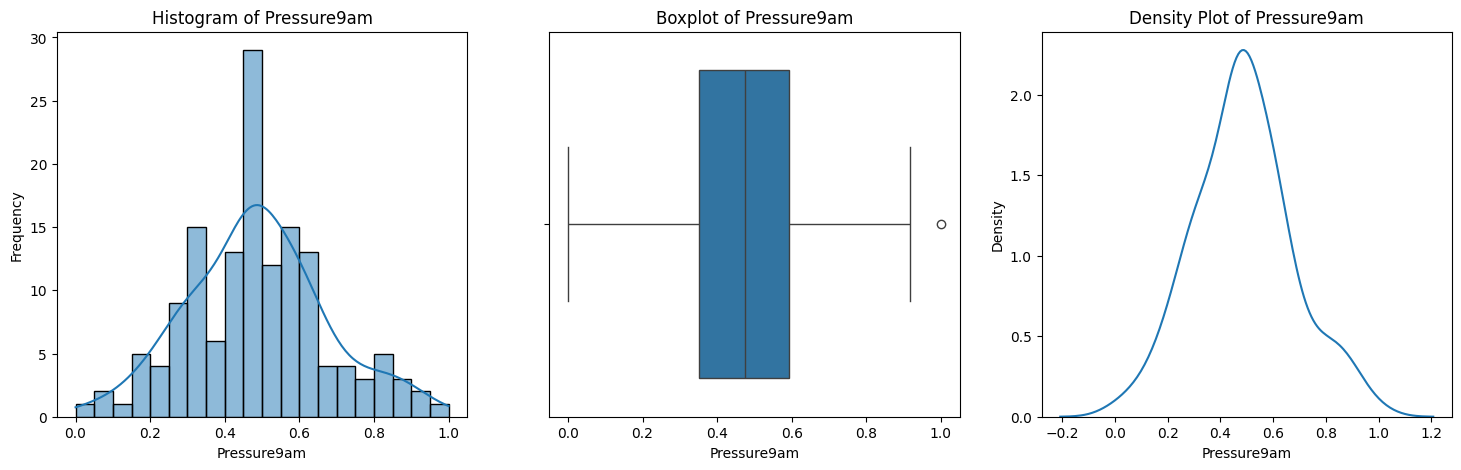

Pressure9am


<ipython-input-36-10e94282d1be>:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], ax=axes[2])


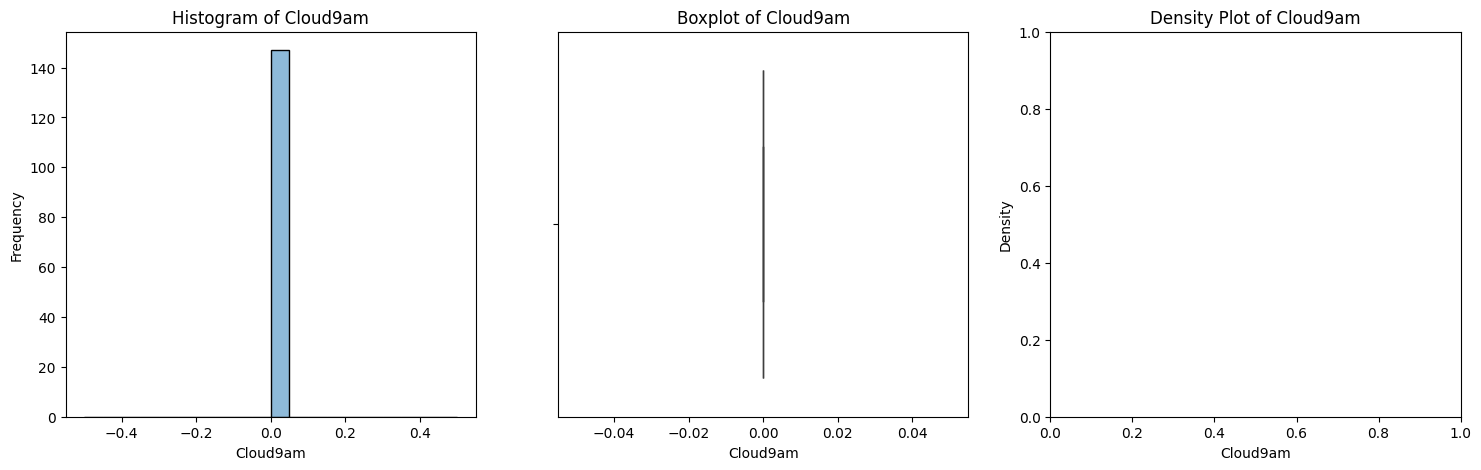

Cloud9am


<ipython-input-36-10e94282d1be>:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], ax=axes[2])


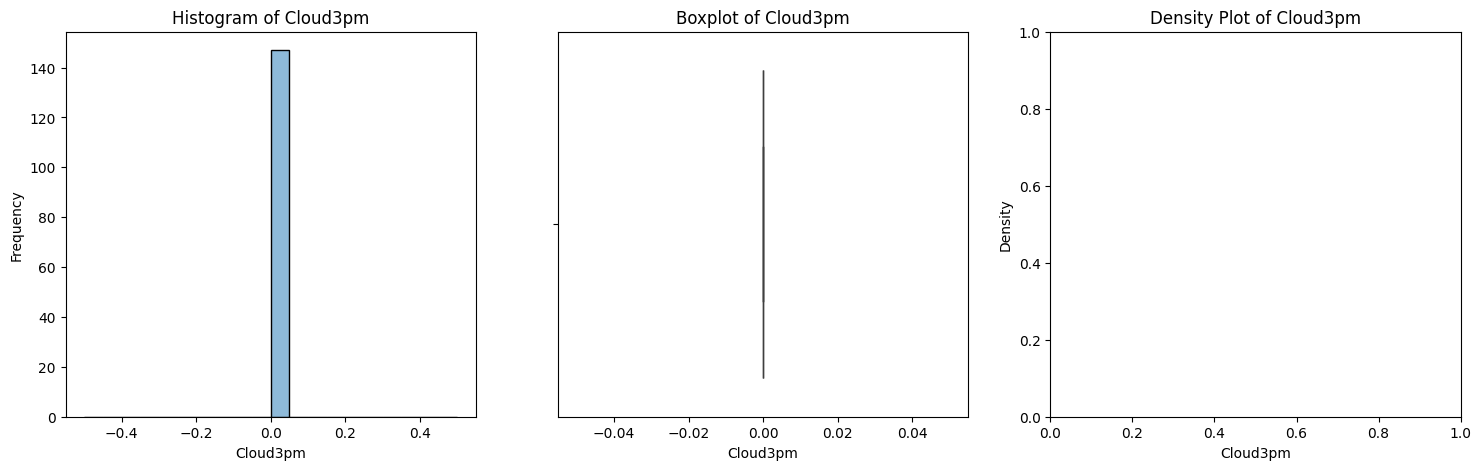

Cloud3pm


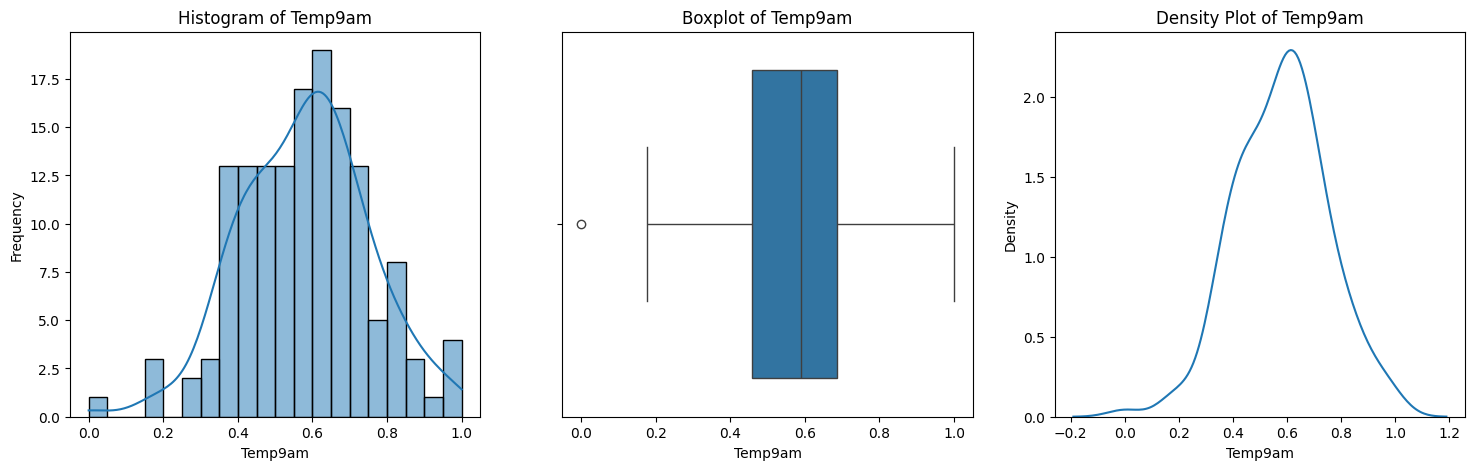

Temp9am


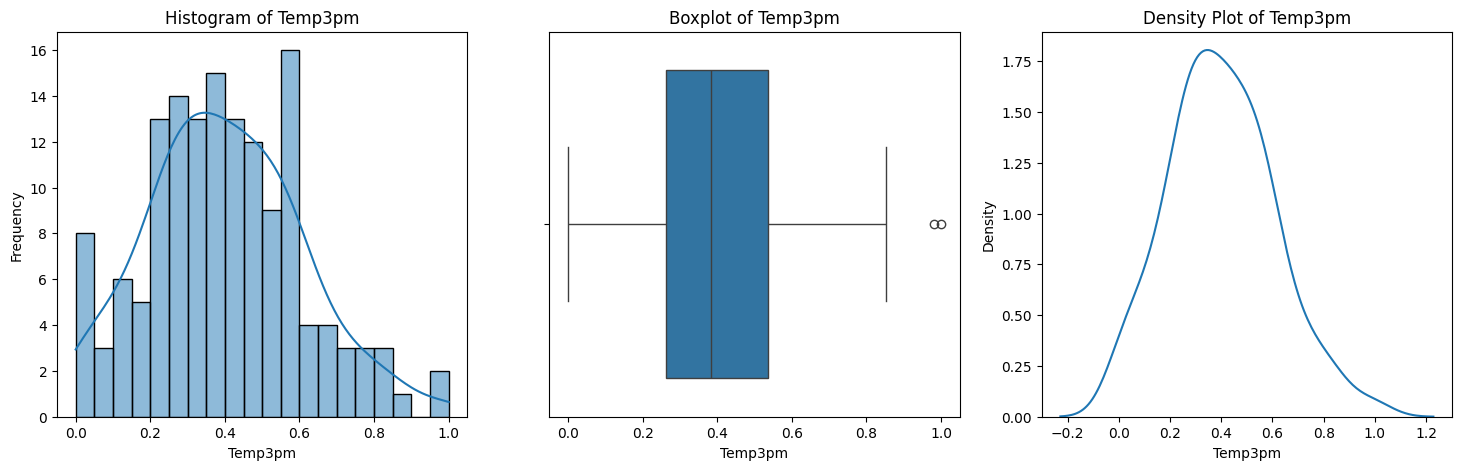

Temp3pm


In [ ]:
# List of variables to visualize
variables_to_visualize = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                          'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in variables_to_visualize:
    try:
        # Create a shape with three sub-graphs
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Histogram with KDE (Kernel Density Estimate)
        sns.histplot(df[col], bins=20, kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')

        # Boxplot
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')

        # Density plot
        sns.kdeplot(df[col], ax=axes[2])
        axes[2].set_title(f'Density Plot of {col}')

        plt.show()

        # Display statistics
        print(col)

    except Exception as e:
        # Error handling for each variable
        print(f'Error processing {col}: {e}')

## **5. Re-fitting the Model**

In [ ]:
df=df.dropna()

In [ ]:
dff=dff.dropna()

In [ ]:
dff

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2,0.608763,0.656024,0.058321,0.706534,0.884715,0.580091,0.515634,0.764131,0.291464,0.185501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.546291,0.721996,0.000000,0.706534,0.884715,0.391341,0.418316,0.560989,0.135409,0.154520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.689278,0.804745,0.075292,0.706534,0.884715,0.369351,0.509413,0.541250,0.348447,0.213190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.709843,0.852208,0.108964,0.706534,0.884715,0.430606,0.509413,0.524672,0.474980,0.157041,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.783113,0.815024,0.108964,0.706534,0.884715,0.659163,0.606731,0.727813,0.504122,0.157041,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11004,0.454227,0.510759,0.033672,0.577080,0.910802,0.529542,0.615081,0.543538,0.734749,0.777832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20347,0.430277,0.401451,0.208635,0.577080,0.910802,0.504617,0.517762,0.384631,0.864330,0.737458,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
79789,0.555496,0.467293,0.233285,0.341569,0.876574,0.646451,0.662202,0.511612,0.860630,0.672575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
107869,0.751823,0.554080,0.339764,0.481769,0.821258,0.598449,0.615372,0.655171,0.865223,0.828178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
2,1.709009,1.866879,0.000000,1.557905,1.851213,1.941490,1.632912,1.697457,1.906447,1.719452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.728466,1.866879,0.000000,1.556050,1.849940,1.903345,1.632912,1.585504,1.908855,1.738794,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.754624,1.883279,0.000000,1.552301,1.791908,1.898452,1.622005,1.547373,1.908855,1.738794,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,1.777166,1.883279,0.000000,1.559965,1.190450,1.892682,1.472247,1.575774,1.895426,1.724727,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,1.783015,1.881473,0.000000,1.543548,1.192987,1.917336,1.587130,1.682767,1.893018,1.705385,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38500,1.431515,1.653104,0.734976,0.799374,1.077248,1.936811,1.681820,1.619579,2.058230,2.109247,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
16013,1.273697,1.618099,0.734976,0.555036,1.194698,1.950613,1.656846,1.743179,2.093573,2.102937,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
44099,1.296925,1.667007,0.386097,0.277518,1.263726,2.008235,1.711283,1.803118,2.042389,2.037441,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16363,1.379161,1.663094,0.396402,0.277518,0.872374,1.994983,1.603711,1.787250,2.052884,2.047624,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### **For the Initial model dataset**

In [ ]:
X = df.drop('RainTomorrow', axis=1).values
y = df['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_1 = LogisticRegression(max_iter = 100000)
model_1.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)
roc_auc_1 = roc_auc_score(y_test, y_pred_1)

print('Accuracy = ', accuracy_1)
print('F-1 Score = ', f1_1)
print('ROC-AUC = ', roc_auc_1)

Accuracy =  0.897344971813057
F-1 Score =  0.8976149451346694
ROC-AUC =  0.8973726289447967


#### **The dataset with HMV**

In [ ]:
X = dff.drop('RainTomorrow', axis=1).values
y = dff['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_2 = LogisticRegression(max_iter = 100000)
model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)
roc_auc_2 = roc_auc_score(y_test, y_pred_2)

print('Accuracy = ', accuracy_2)
print('F-1 Score = ', f1_2)
print('ROC-AUC = ', roc_auc_2)

Accuracy =  0.8848315245830773
F-1 Score =  0.8853246341352906
ROC-AUC =  0.8848289319193758


In [ ]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
78003,14.4,24.4,0.0,9.2,10.1,44.0,17.0,20.0,63.0,41.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78004,14.0,20.3,0.0,8.6,9.9,57.0,24.0,26.0,51.0,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78043,12.8,20.1,0.0,10.6,12.2,48.0,7.0,22.0,54.0,39.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78044,13.3,21.2,0.6,7.6,3.4,30.0,9.0,19.0,97.0,60.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78115,9.1,15.7,0.0,1.6,5.2,35.0,13.0,19.0,81.0,67.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95171,16.9,25.4,0.0,9.8,10.9,39.0,19.0,13.0,30.0,25.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95213,18.0,21.4,0.4,3.0,1.4,41.0,20.0,20.0,62.0,49.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95228,14.3,23.4,0.0,7.6,10.4,37.0,20.0,19.0,31.0,21.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
95276,18.2,27.3,0.0,5.0,10.2,37.0,28.0,17.0,28.0,24.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


###Comparing the results

In [ ]:
# Compare the results
model_results = {'Model': ['Baseline', 'Improved Initial Model Performance', 'Improved Model Performance With HMW'],
    'Accuracy': [accuracy_0, accuracy_1, accuracy_2],
    'F1 Score': [f1_0, f1_1, f1_2],
    'ROC-AUC': [roc_auc_0, roc_auc_1, roc_auc_2]}
df_model_results = pd.DataFrame(model_results)
print(df_model_results)

                                 Model  Accuracy  F1 Score   ROC-AUC
0                             Baseline  0.858135  0.631288  0.747214
1   Improved Initial Model Performance  0.897345  0.897615  0.897373
2  Improved Model Performance With HMW  0.884832  0.885325  0.884829


In [ ]:
# Compare the results of Improved Initial Model Performance and less improved model perfomances (that are combinations of the method(s) we evoided and applyed)
model_results = {'Model': ['Improved Initial Model Performance', 'Badly Improved Initial Model Performance ex1', 'Badly Improved Initial Model Performance ex2'],
    'Accuracy': [accuracy_1, accuracy_bad1, accuracy_bad2],
    'F1 Score': [f1_1, f1_bad1, f1_bad2],
    'ROC-AUC': [roc_auc_1, roc_auc_bad1, roc_auc_bad2]}
df_model_results = pd.DataFrame(model_results)
print(df_model_results)

                                          Model  Accuracy  F1 Score   ROC-AUC
0            Improved Initial Model Performance  0.897345  0.897615  0.897373
1  Badly Improved Initial Model Performance ex1  0.789474  0.720930  0.778770
2  Badly Improved Initial Model Performance ex2  0.789335  0.789210  0.789335


# **Showing why we've evoided using some methods**

We will now try to use methods that we've evoided previosly (results are already in "Compare the results" section)

In [ ]:
# Reading data
#df_bad = pd.read_csv('/content/weatherAUS.csv')
df_bad = pd.read_csv(r"/content/drive/MyDrive/weatherAUS.csv")
df_bad.head()
df_bad.replace('nan', 'missing', inplace=True)
df_bad.dropna(inplace=True)

df_bad['Date'] = pd.to_datetime(df_bad['Date'])
df_bad['Year'] = df_bad['Date'].dt.year
df_bad['Month'] = df_bad['Date'].dt.month
df_bad['Day'] = df_bad['Date'].dt.day
df_bad.drop('Date', axis=1, inplace = True)

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df_bad[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']])
encoded_df_bad = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']))

df_bad = pd.concat([df_bad.reset_index(drop=True), encoded_df_bad.reset_index(drop=True)], axis=1).drop(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], axis=1)
df_bad['RainTomorrow'] = df_bad['RainTomorrow'].map({'No': 0, 'Yes': 1}, na_action='ignore')

print(df_bad['RainTomorrow'].isnull().sum())
df_bad.replace(np.nan, 0, inplace=True)
df_bad

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
0


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: xlabel='RainTomorrow', ylabel='count'>

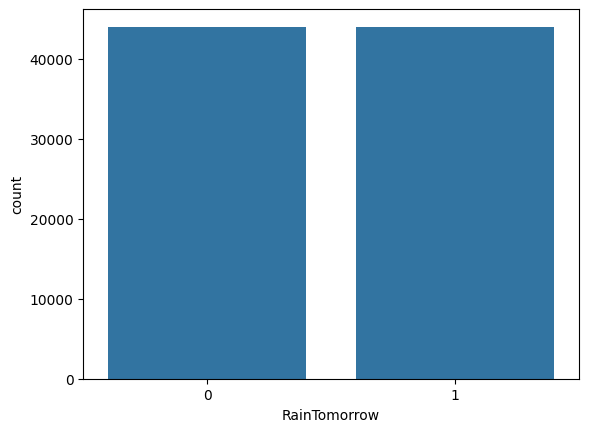

In [ ]:
yes = df_bad[df_bad['RainTomorrow'] == 1]
no = df_bad[df_bad['RainTomorrow'] == 0]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df_bad = pd.concat([no, yes_oversampled])
sns.countplot(df_bad, x='RainTomorrow')

*Let's remove outliers*

In [ ]:
def remove_outliers_iqr(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Removing outliers

cont_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

lever = 1

if (lever == 1):
  df_bad = remove_outliers_iqr(df_bad)
  print("DataFrame after removing outliers using IQR:")
  print(df_bad)

else:
  for i in df_bad[cont_cols].columns:
    df_bad[i] = winsorize(df_bad[i], limits=[0.05, 0.05])
  df_bad.reset_index(drop=True)

DataFrame after removing outliers using IQR:
       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
10891     11.0     29.0       0.0          9.8      11.6           43.0   
10900     15.8     33.9       0.0          8.4      12.2           54.0   
10905     16.4     32.3       0.0         12.0      12.3           44.0   
10913     15.3     23.2       0.0         10.2       8.7           61.0   
10925      8.7     21.6       0.0          6.0       8.8           41.0   
...        ...      ...       ...          ...       ...            ...   
27582     11.0     14.9       0.4          3.8       4.9           67.0   
12281      2.6     11.5       0.4          0.8       2.4           22.0   
28075     11.3     19.5       3.8          5.4       5.3           35.0   
27647      9.1     14.1       0.4          2.0       3.2           37.0   
27065      7.2     13.8       2.8          3.0       6.8           39.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidi

*Or Let's transform outliers*

In [ ]:
import numpy as np
from scipy import stats

def log_transform(column):
    if np.any(column <= 0):
        raise ValueError("Все значения должны быть положительными для логарифмической трансформации")
    return np.log(column)

def sqrt_transform(column):
    return np.sqrt(column)

def box_cox_transform(column):
    if np.any(column <= 0):
        raise ValueError("Все значения должны быть положительными для трансформации Бокса-Кокса")
    transformed_data, _ = stats.boxcox(column)
    return transformed_data

def yeo_johnson_transform(column):
    transformed_data, _ = stats.yeojohnson(column)
    return transformed_data

def select_transform(column):
    if np.all(column > 0):
        skewness = stats.skew(column)
        if abs(skewness) > 1:
            return box_cox_transform
        else:
            return log_transform
    elif np.all(column >= 0):
        return sqrt_transform
    else:
        return yeo_johnson_transform

def identify_outliers(column, method='iqr', threshold=3):
    if method == 'iqr':
        Q1 = np.percentile(column, 25)
        Q3 = np.percentile(column, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = (column < lower_bound) | (column > upper_bound)
    elif method == 'zscore':
        z_scores = np.abs((column - np.mean(column)) / np.std(column))
        outliers = z_scores > threshold
    return outliers

def transform_outliers(dataset, outlier_method='iqr', outlier_threshold=3):
    transformed_dataset = dataset.copy()

    for column in dataset.select_dtypes(include=[np.number]).columns:
        outliers = identify_outliers(dataset[column], method=outlier_method, threshold=outlier_threshold)

        if np.any(outliers):
            transform_func = select_transform(dataset[column])

            if transform_func:
                try:
                    # Трансформируем только выбросы
                    transformed_column = dataset[column].copy()
                    transformed_column[outliers] = transform_func(dataset[column][outliers])
                    transformed_dataset[column] = transformed_column
                    print(f"Выбросы в колонке '{column}' трансформированы с использованием {transform_func.__name__}")
                except ValueError as e:
                    print(f"Ошибка при трансформации выбросов в колонке '{column}': {str(e)}")
            else:
                print(f"Подходящая трансформация для выбросов в колонке '{column}' не найдена")
        else:
            print(f"В колонке '{column}' выбросы не обнаружены")

    return transformed_dataset

# Обработка датасета
df_bad[cont_cols] = transform_outliers(df_bad[cont_cols])

Выбросы в колонке 'MinTemp' трансформированы с использованием yeo_johnson_transform
Выбросы в колонке 'MaxTemp' трансформированы с использованием log_transform
Выбросы в колонке 'Rainfall' трансформированы с использованием sqrt_transform
Выбросы в колонке 'Evaporation' трансформированы с использованием sqrt_transform
В колонке 'Sunshine' выбросы не обнаружены
Выбросы в колонке 'WindGustSpeed' трансформированы с использованием log_transform
Выбросы в колонке 'WindSpeed9am' трансформированы с использованием log_transform
Выбросы в колонке 'WindSpeed3pm' трансформированы с использованием log_transform
Выбросы в колонке 'Humidity9am' трансформированы с использованием sqrt_transform
В колонке 'Humidity3pm' выбросы не обнаружены
Выбросы в колонке 'Pressure9am' трансформированы с использованием log_transform
Выбросы в колонке 'Pressure3pm' трансформированы с использованием log_transform
В колонке 'Cloud9am' выбросы не обнаружены
В колонке 'Cloud3pm' выбросы не обнаружены
Выбросы в колонке 'Te

In [ ]:
# Processing the dataset
df_bad[cont_cols] = process_dataset(df_bad[cont_cols])

Column 'MinTemp' is transformed using yeo_johnson_transform
Column 'MaxTemp' is transformed using log_transform
Column 'Rainfall' is transformed using sqrt_transform
Column 'Evaporation' is transformed using sqrt_transform
Column 'Sunshine' is transformed using sqrt_transform
Column 'WindGustSpeed' is transformed using log_transform
Column 'WindSpeed9am' is transformed using log_transform
Column 'WindSpeed3pm' is transformed using log_transform
Column 'Humidity9am' is transformed using sqrt_transform
Column 'Humidity3pm' is transformed using sqrt_transform
Column 'Pressure9am' is transformed using box_cox_transform
Column 'Pressure3pm' is transformed using box_cox_transform
Column 'Cloud9am' is transformed using sqrt_transform
Column 'Cloud3pm' is transformed using sqrt_transform
Column 'Temp9am' is transformed using yeo_johnson_transform
Column 'Temp3pm' is transformed using log_transform


*Let's scale with StandartScaler*

In [ ]:
  scaler = StandardScaler()
  # Fit and transform the data
  df_bad[contin] = scaler.fit_transform(df_bad[contin])

In [ ]:
X = df_bad.drop('RainTomorrow', axis=1).values
y = df_bad['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_bad1 = LogisticRegression(max_iter = 10000)
model_bad1.fit(X_train, y_train)

y_pred_bad1 = model_bad1.predict(X_test)
accuracy_bad1 = accuracy_score(y_test, y_pred_bad1)
f1_bad1 = f1_score(y_test, y_pred_bad1)
roc_auc_bad1 = roc_auc_score(y_test, y_pred_bad1)

print('Accuracy = ', accuracy_bad1)
print('F-1 Score = ', f1_bad1)
print('ROC-AUC = ', roc_auc_bad1)

Accuracy =  0.7894736842105263
F-1 Score =  0.7209302325581395
ROC-AUC =  0.7787698412698413


In [ ]:
X = df_bad.drop('RainTomorrow', axis=1).values
y = df_bad['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model_bad2 = LogisticRegression(max_iter = 100000)
model_bad2.fit(X_train, y_train)

y_pred_bad2 = model_bad2.predict(X_test)
accuracy_bad2 = accuracy_score(y_test, y_pred_bad2)
f1_bad2 = f1_score(y_test, y_pred_bad2)
roc_auc_bad2 = roc_auc_score(y_test, y_pred_bad2)

print('Accuracy = ', accuracy_bad2)
print('F-1 Score = ', f1_bad2)
print('ROC-AUC = ', roc_auc_bad2)

Accuracy =  0.7893349093058144
F-1 Score =  0.7892103347889374
ROC-AUC =  0.7893352832428274


# **Conclusion for the whole work**

According to the results of the study, significant improvements in the model structure were revealed. This achievement demonstrates the effectiveness of the applied methods of data analysis and processing, despite the high degree of correlation between variables.
Comparison of baseline and improved model metrics:



```
Model       Accuracy    F1 Score	ROC-AUC
Baseline	0.858135	0.631288	0.747214
Improved	0.897345	0.897615	0.897373
```


As can be seen from the table, the improved model shows substantial gains across all key metrics:
* Accuracy increased by 4.6%
* F1 score grew by an impressive 26.7%
* ROC-AUC showed an increase of 15.1%

These improvements indicate a significant enhancement in the model's quality and its ability to classify more accurately.